
# **Distant Sites Prediction**
1.   Bone Classification (Yes/No)
2.   Lung Classification (Yes/No)
3.   Liver Classification (Yes/No)
4.   Brain Classification (Yes/No)


## **Steps**

1.   Data Exploring
*  1.1 Load Data
*  1.2 Data selection from general merged data
---
2.   Data Balancing
*  2.1 Balancing 
*  2.2 Extracting subset from data for validation

---
3.   Feature Engineering
* 3.1 Prepare features and target variable
* 3.2 One-hot encoding
* 3.3 Train-Test Split

---

4.   Model Training and Testing
* 4.1 XGBoost
* 4.2 Random Forest 
* 4.3 SVM
* 4.4 LGBM

---
5.   Subset Validation

6.   Baheya Validation


# **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc
from sklearn import preprocessing
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import lightgbm as lgb
import tensorflow as tf
import joblib
from sklearn.preprocessing import StandardScaler

c:\Users\nadat\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **1. Data Exploring**
## **1.1 Load Data**



In [2]:
seer_data = pd.read_csv('Final_general_merged_reg.csv')
seer_data.head()

C:\Users\nadat\AppData\Local\Temp\ipykernel_7348\1841206013.py:1: DtypeWarning: Columns (0,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  seer_data = pd.read_csv('Final_general_merged_reg.csv')


Menopausal Status Tumor Size Lymph Node Status Tumor Grade Mol Subtype  \
0              Post         T2                N3         III   Luminal A   
1               Pre         T1                N0         III   Luminal A   
2               Pre         T1                N1          II   Luminal B   
3               Pre         T2                N1          II   Luminal B   
4              Post         T2                N2         III   Luminal B   

                         Histological Type        ER        PR      HER2  \
0              Infiltrating duct carcinoma  Positive  Negative  Negative   
1              Infiltrating duct carcinoma  Positive  Positive  Negative   
2              Infiltrating duct carcinoma  Positive  Positive  Negative   
3  Infiltrating duct and lobular carcinoma  Positive  Positive  Negative   
4  Infiltrating duct and lobular carcinoma  Positive  Positive  Negative   

  Chemotherapy  ... Overall Survival Status (Month)  \
0           No  ...                      140.500000   
1           No  ...                       84.633333   
2          Yes  ...                      163.700000   
3          Yes  ...                      164.933333   
4          Yes  ...                       41.366667   

  Recurrence Free Status (Month) Recurrence Free Status          Age  Surgery  \
0                         138.65         Not Recurrence  75-79 years      NaN   
1                          83.52         Not Recurrence  40-44 years      NaN   
2                         151.28             Recurrence  45-49 years      NaN   
3                         162.76         Not Recurrence  45-49 years      NaN   
4                          18.55             Recurrence  75-79 years      NaN   

  Recurrence_Type Bone_metastasis Brain_metastasis Lung_metastasis  \
0             NaN             NaN              NaN             NaN   
1             NaN             NaN              NaN             NaN   
2             NaN             NaN              NaN             NaN   
3             NaN             NaN              NaN             NaN   
4             NaN             NaN              NaN             NaN   

  Liver_metastasis  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 23 columns]

# **1.2. Data selection from general merged data**

In [3]:
seer_data.columns

Index(['Menopausal Status', 'Tumor Size', 'Lymph Node Status', 'Tumor Grade',
       'Mol Subtype', 'Histological Type', 'ER', 'PR', 'HER2', 'Chemotherapy',
       'Radiotherapy', 'Type of Surgery', 'Tumor Location',
       'Overall Survival Status (Month)', 'Recurrence Free Status (Month)',
       'Recurrence Free Status', 'Age', 'Surgery', 'Recurrence_Type',
       'Bone_metastasis', 'Brain_metastasis', 'Lung_metastasis',
       'Liver_metastasis'],
      dtype='object')

In [4]:
selected_data = seer_data[['Age', 'Overall Survival Status (Month)',
                               'Tumor Grade', 'Tumor Size','Lymph Node Status', 'Surgery', 'Recurrence_Type',
                                'Chemotherapy', 'Radiotherapy', 'Mol Subtype', 'ER','HER2','Bone_metastasis', 'Brain_metastasis', 'Lung_metastasis','Liver_metastasis']]

In [5]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272251 entries, 0 to 272250
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age                              271609 non-null  object 
 1   Overall Survival Status (Month)  272251 non-null  float64
 2   Tumor Grade                      272251 non-null  object 
 3   Tumor Size                       272251 non-null  object 
 4   Lymph Node Status                272251 non-null  object 
 5   Surgery                          268224 non-null  object 
 6   Recurrence_Type                  269708 non-null  object 
 7   Chemotherapy                     270687 non-null  object 
 8   Radiotherapy                     270687 non-null  object 
 9   Mol Subtype                      272251 non-null  object 
 10  ER                               272251 non-null  object 
 11  HER2                             272251 non-null  object 
 12  Bo

In [6]:
selected_data.isna().sum()

Age                                 642
Overall Survival Status (Month)       0
Tumor Grade                           0
Tumor Size                            0
Lymph Node Status                     0
Surgery                            4027
Recurrence_Type                    2543
Chemotherapy                       1564
Radiotherapy                       1564
Mol Subtype                           0
ER                                    0
HER2                                  0
Bone_metastasis                    3572
Brain_metastasis                   3572
Lung_metastasis                    3572
Liver_metastasis                   3572
dtype: int64

In [7]:
selected_data = selected_data.dropna()

In [8]:
selected_data.isna().sum()

Age                                0
Overall Survival Status (Month)    0
Tumor Grade                        0
Tumor Size                         0
Lymph Node Status                  0
Surgery                            0
Recurrence_Type                    0
Chemotherapy                       0
Radiotherapy                       0
Mol Subtype                        0
ER                                 0
HER2                               0
Bone_metastasis                    0
Brain_metastasis                   0
Lung_metastasis                    0
Liver_metastasis                   0
dtype: int64

In [9]:
selected_data.shape

(267582, 16)

## **2. Data Balancing**


### **2.1. Locations Balancing**

In [10]:
selected_data['Bone_metastasis'].value_counts()

Bone_metastasis
No     261308
Yes      6274
Name: count, dtype: int64

In [11]:
selected_data['Liver_metastasis'].value_counts()

Liver_metastasis
No     265155
Yes      2427
Name: count, dtype: int64

In [12]:
selected_data['Lung_metastasis'].value_counts()

Lung_metastasis
No     264734
Yes      2848
Name: count, dtype: int64

In [13]:
selected_data['Brain_metastasis'].value_counts()

Brain_metastasis
No     266956
Yes       626
Name: count, dtype: int64

In [14]:
selected_data['Recurrence_Type'].value_counts()

Recurrence_Type
Local       175994
Regional     81463
Distant      10125
Name: count, dtype: int64

In [15]:
def balance_dataset(data, target_column, target_value, sample_size):
   
    target_data = data[data[target_column] == target_value].dropna(subset=[target_column])
    no_target_only = data[(data[target_column] == 'No')]

    # Define sub-categories for 'No' class
    no_local_recurrence = no_target_only[(data['Recurrence_Type'] == 'Local')]
    no_distant_recurrence = no_target_only[
        (data['Recurrence_Type'] == 'Distant') &
        (data[['Bone_metastasis', 'Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis']] == 'No').all(axis=1)
    ]
    no_reg_recurrence = no_target_only[(data['Recurrence_Type'] == 'Regional')]


    sample_size_per_category = sample_size // 3

    def sample_or_all(df, n):
        return df if len(df) < n else df.sample(n=n, random_state=42)

    sampled_no_other_locations = sample_or_all(no_distant_recurrence, sample_size_per_category)
    sampled_no_local_recurrence = sample_or_all(no_local_recurrence, sample_size_per_category)
    sampled_no_reg_recurrence = sample_or_all(no_reg_recurrence, sample_size_per_category)

    # Concatenate the sampled 'No' data and the 'Yes' data
    balanced_no_data = pd.concat([sampled_no_other_locations,sampled_no_local_recurrence,sampled_no_reg_recurrence], axis=0)
    balanced_data = pd.concat([balanced_no_data, target_data], axis=0)

    return balanced_data



# Adjust sample sizes as necessary
bone_balanced_seer = balance_dataset(selected_data, 'Bone_metastasis', 'Yes', 6700)
lung_balanced_seer = balance_dataset(selected_data, 'Lung_metastasis', 'Yes', 3000)
liver_balanced_seer = balance_dataset(selected_data, 'Liver_metastasis', 'Yes', 2600)
brain_balanced_seer = balance_dataset(selected_data, 'Brain_metastasis', 'Yes', 650)



C:\Users\nadat\AppData\Local\Temp\ipykernel_7348\3512389703.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_local_recurrence = no_target_only[(data['Recurrence_Type'] == 'Local')]
C:\Users\nadat\AppData\Local\Temp\ipykernel_7348\3512389703.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_distant_recurrence = no_target_only[
C:\Users\nadat\AppData\Local\Temp\ipykernel_7348\3512389703.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_reg_recurrence = no_target_only[(data['Recurrence_Type'] == 'Regional')]
C:\Users\nadat\AppData\Local\Temp\ipykernel_7348\3512389703.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_local_recurrence = no_target_only[(data['Recurrence_Type'] == 'Local')]
C:\Users\nadat\AppData\Local\Temp\ipykernel_7348\3512389703.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_distant_re

In [16]:
bone_balanced_seer['Recurrence_Type'].value_counts()

Recurrence_Type
Distant     7959
Local       2233
Regional    2233
Name: count, dtype: int64

In [17]:
lung_balanced_seer['Recurrence_Type'].value_counts()

Recurrence_Type
Distant     3847
Local       1001
Regional    1000
Name: count, dtype: int64

In [18]:
liver_balanced_seer['Recurrence_Type'].value_counts()

Recurrence_Type
Distant     3293
Local        866
Regional     866
Name: count, dtype: int64

In [19]:
brain_balanced_seer['Recurrence_Type'].value_counts()

Recurrence_Type
Distant     842
Local       216
Regional    216
Name: count, dtype: int64

In [20]:
bone_balanced_seer = bone_balanced_seer.drop(columns=['Recurrence_Type'],axis=1)
lung_balanced_seer = lung_balanced_seer.drop(columns=['Recurrence_Type'],axis=1)
liver_balanced_seer = liver_balanced_seer.drop(columns=['Recurrence_Type'],axis=1)
brain_balanced_seer = brain_balanced_seer.drop(columns=['Recurrence_Type'],axis=1)

**Function for visualizing**

In [21]:
def visualize_balance(data_before, data_after, target_column):
    categories = sorted(set(data_before[target_column].unique()) | set(data_after[target_column].unique()))
    num_categories = len(categories)
    width = 0.35  # Width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))
    # Before balancing
    before_counts = data_before[target_column].value_counts().reindex(categories, fill_value=0)
    before_indices = np.arange(num_categories)
    ax.bar(before_indices - width/2, before_counts, width, label='Before Balancing', color='skyblue')

    # After balancing
    after_counts = data_after[target_column].value_counts().reindex(categories, fill_value=0)
    after_indices = np.arange(num_categories)
    ax.bar(after_indices + width/2, after_counts, width, label='After Balancing', color='salmon')
    ax.set_ylim(0, 50000)  # Set y-axis range from 0 to 100

    ax.set_xlabel(target_column)
    ax.set_ylabel('Count')
    ax.set_title('Before and After Balancing')
    ax.set_xticks(before_indices)
    ax.set_xticklabels(categories)
    ax.legend()
    plt.show()

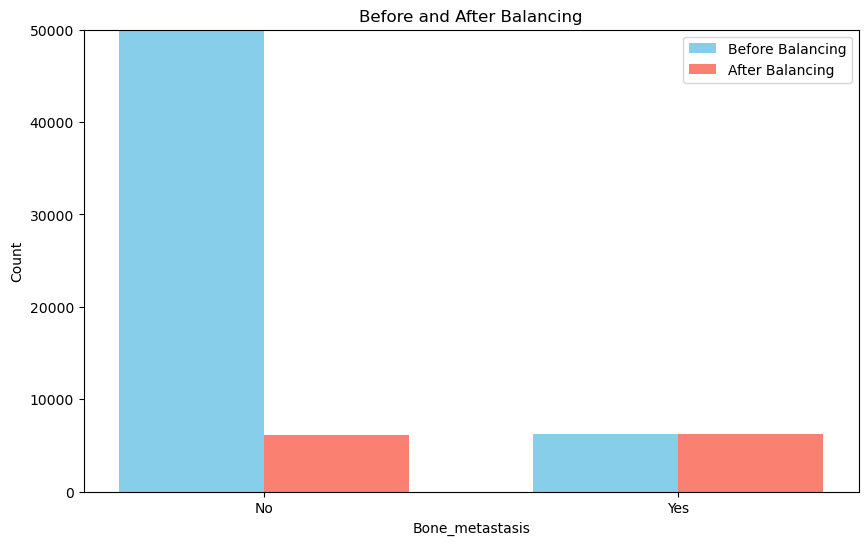

In [22]:
# Visualize balance for Bone metastasis
visualize_balance(selected_data, bone_balanced_seer, 'Bone_metastasis')

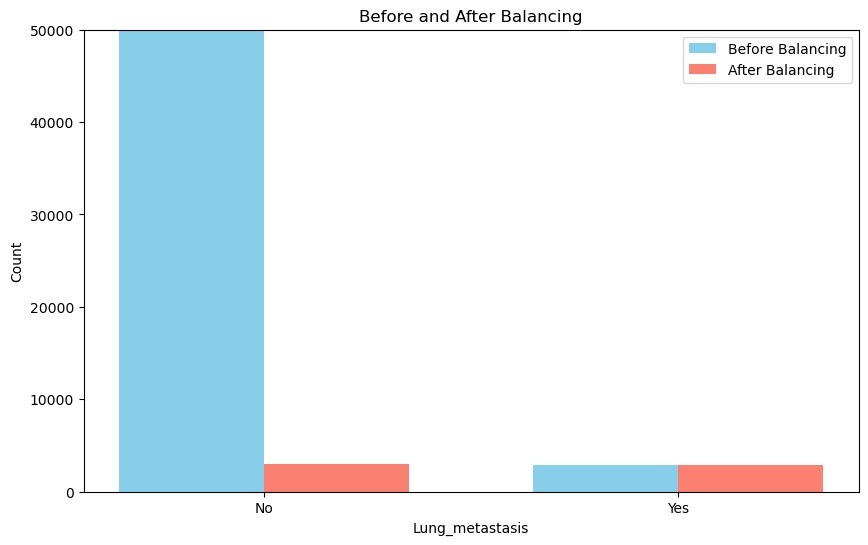

In [23]:
visualize_balance(selected_data, lung_balanced_seer, 'Lung_metastasis')

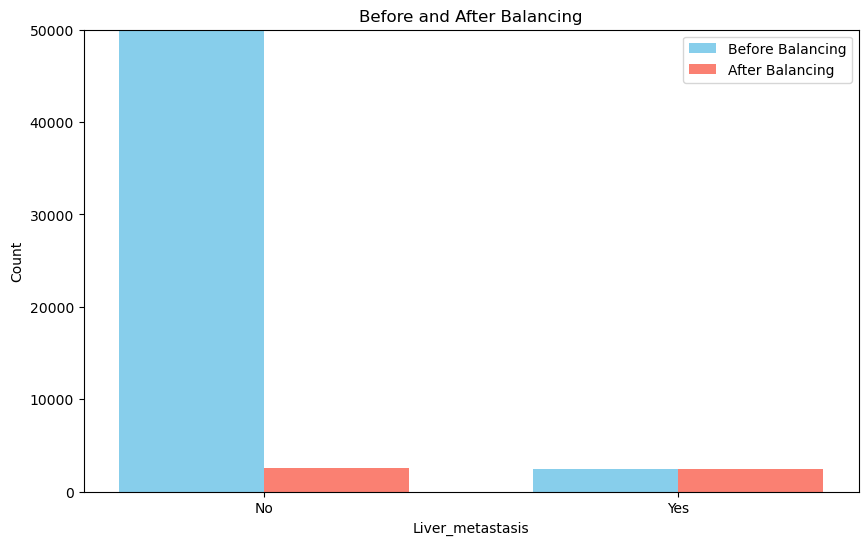

In [24]:
visualize_balance(selected_data, liver_balanced_seer, 'Liver_metastasis')

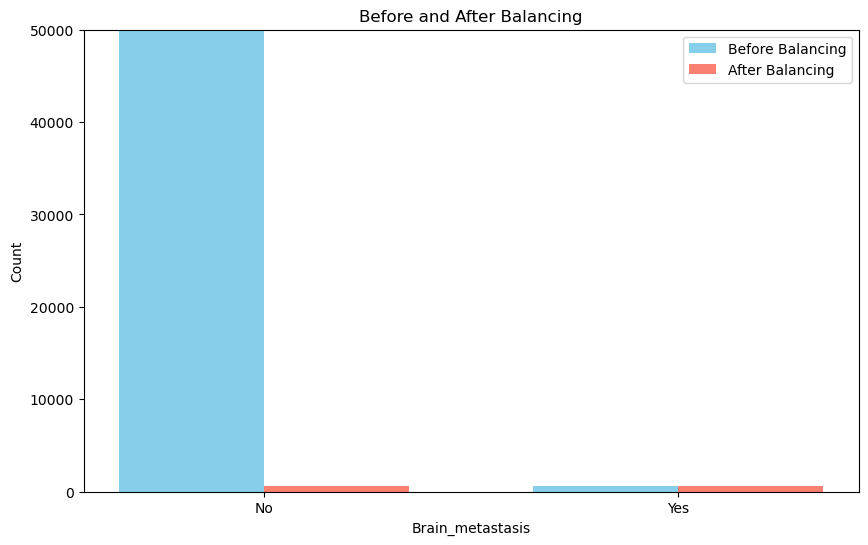

In [25]:
visualize_balance(selected_data, brain_balanced_seer, 'Brain_metastasis')

**See insights about Mol subtype**

In [26]:
merged_loc = pd.concat([liver_balanced_seer,bone_balanced_seer,lung_balanced_seer,brain_balanced_seer])

C:\Users\nadat\AppData\Local\Temp\ipykernel_7348\355411228.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metastatic_rates = df_melted.groupby(['Mol Subtype', 'Metastatic Site']).apply(lambda x: (x['Metastasis'] == 'Yes').mean() * 100).reset_index(name='Metastatic Rate')


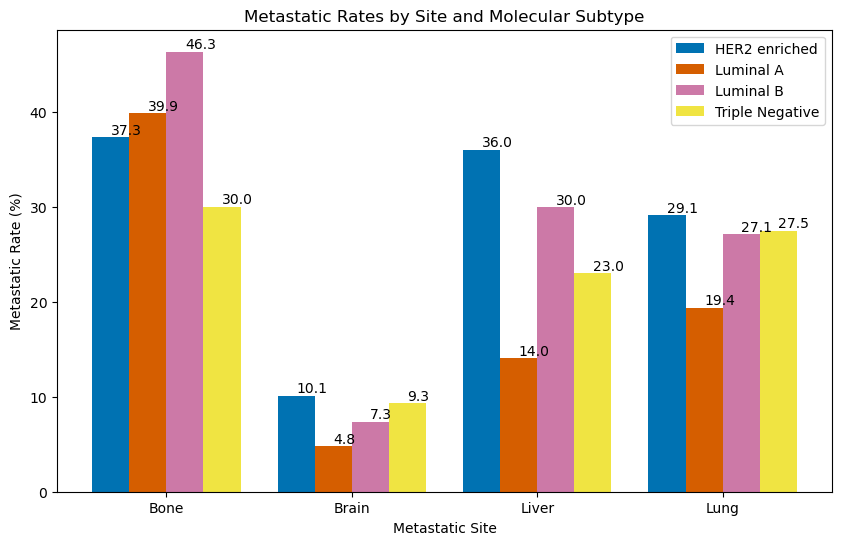

In [27]:
# Melt the DataFrame to long format
df_melted = merged_loc.melt(id_vars=['Mol Subtype'], 
                    value_vars=['Bone_metastasis', 'Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis'],
                    var_name='Metastatic Site', value_name='Metastasis')

# Clean up the Metastatic Site column
df_melted['Metastatic Site'] = df_melted['Metastatic Site'].str.replace('_metastasis', '')

# Calculate metastatic rates
metastatic_rates = df_melted.groupby(['Mol Subtype', 'Metastatic Site']).apply(lambda x: (x['Metastasis'] == 'Yes').mean() * 100).reset_index(name='Metastatic Rate')

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Locations for groups
index = range(len(metastatic_rates['Metastatic Site'].unique()))

# Plot each subtype
subtypes = metastatic_rates['Mol Subtype'].unique()
# Use colors that are colorblind-friendly
colors = ['#0072B2', '#D55E00', '#CC79A7', '#F0E442']
for i, subtype in enumerate(subtypes):
    rates = metastatic_rates[metastatic_rates['Mol Subtype'] == subtype]['Metastatic Rate']
    bars = plt.bar([p + bar_width*i for p in index], rates, width=bar_width, label=subtype, color=colors[i])
    # Add text labels above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='bottom')

# Add labels, title, legend
plt.xlabel('Metastatic Site')
plt.ylabel('Metastatic Rate (%)')
plt.title('Metastatic Rates by Site and Molecular Subtype')
plt.xticks([p + 1.5 * bar_width for p in index], metastatic_rates['Metastatic Site'].unique())
plt.legend()

plt.show()


**See insights about locations**

In [28]:
Bone_data = bone_balanced_seer[bone_balanced_seer['Bone_metastasis'] == 'No']

# Calculate value counts and represent as percentages
tumor_size_counts = Bone_data['Tumor Size'].value_counts(normalize=True) * 100
lymph_node_status_counts = Bone_data['Lymph Node Status'].value_counts(normalize=True) * 100
tumor_grade_counts = Bone_data['Tumor Grade'].value_counts(normalize=True) * 100
Mol_counts = Bone_data['Mol Subtype'].value_counts(normalize=True) * 100

# Print the counts as percentages
print(tumor_size_counts)
print(lymph_node_status_counts)
print(tumor_grade_counts)
print(Mol_counts)


Tumor Size
T1    43.814014
T2    33.961957
T4    11.656641
T3    10.486100
T0     0.081288
Name: proportion, dtype: float64
Lymph Node Status
N0    41.635506
N1    33.929442
N3    15.883596
N2     8.551455
Name: proportion, dtype: float64
Tumor Grade
III    42.838563
II     41.082751
I      16.078686
Name: proportion, dtype: float64
Mol Subtype
Luminal A          66.525768
Triple Negative    14.322874
Luminal B          12.534547
HER2 enriched       6.616810
Name: proportion, dtype: float64


In [29]:
liver_data = liver_balanced_seer[liver_balanced_seer['Liver_metastasis'] == 'No']

# Calculate value counts and represent as percentages
tumor_size_counts = liver_data['Tumor Size'].value_counts(normalize=True) * 100
lymph_node_status_counts = liver_data['Lymph Node Status'].value_counts(normalize=True) * 100
tumor_grade_counts = liver_data['Tumor Grade'].value_counts(normalize=True) * 100
Mol_counts = liver_data['Mol Subtype'].value_counts(normalize=True) * 100

# Print the counts as percentages
print(tumor_size_counts)
print(lymph_node_status_counts)
print(tumor_grade_counts)
print(Mol_counts)


Tumor Size
T1    43.071594
T2    32.486528
T4    13.317937
T3    11.046959
T0     0.076982
Name: proportion, dtype: float64
Lymph Node Status
N0    39.299461
N1    33.102386
N3    18.668206
N2     8.929946
Name: proportion, dtype: float64
Tumor Grade
III    44.572748
II     40.107775
I      15.319477
Name: proportion, dtype: float64
Mol Subtype
Luminal A          65.819861
Triple Negative    14.588145
Luminal B          12.856043
HER2 enriched       6.735951
Name: proportion, dtype: float64


In [30]:
lung_data = lung_balanced_seer[lung_balanced_seer['Lung_metastasis'] == 'No']

# Calculate value counts and represent as percentages
tumor_size_counts = lung_data['Tumor Size'].value_counts(normalize=True) * 100
lymph_node_status_counts = lung_data['Lymph Node Status'].value_counts(normalize=True) * 100
tumor_grade_counts = lung_data['Tumor Grade'].value_counts(normalize=True) * 100
Mol_counts = lung_data['Mol Subtype'].value_counts(normalize=True) * 100

# Print the counts as percentages
print(tumor_size_counts)
print(lymph_node_status_counts)
print(tumor_grade_counts)
print(Mol_counts)


Tumor Size
T1    42.9
T2    33.1
T4    13.1
T3    10.8
T0     0.1
Name: proportion, dtype: float64
Lymph Node Status
N0    39.466667
N1    33.333333
N3    18.366667
N2     8.833333
Name: proportion, dtype: float64
Tumor Grade
III    44.733333
II     40.866667
I      14.400000
Name: proportion, dtype: float64
Mol Subtype
Luminal A          64.333333
Triple Negative    15.233333
Luminal B          13.133333
HER2 enriched       7.300000
Name: proportion, dtype: float64


In [31]:
Brain_data = brain_balanced_seer[brain_balanced_seer['Brain_metastasis'] == 'No']

# Calculate value counts and represent as percentages
tumor_size_counts = Brain_data['Tumor Size'].value_counts(normalize=True) * 100
lymph_node_status_counts = Brain_data['Lymph Node Status'].value_counts(normalize=True) * 100
tumor_grade_counts = Brain_data['Tumor Grade'].value_counts(normalize=True) * 100
Mol_counts = Brain_data['Mol Subtype'].value_counts(normalize=True) * 100

# Print the counts as percentages
print(tumor_size_counts)
print(lymph_node_status_counts)
print(tumor_grade_counts)
print(Mol_counts)


Tumor Size
T1    44.290123
T2    34.722222
T4    12.962963
T3     8.024691
Name: proportion, dtype: float64
Lymph Node Status
N0    41.049383
N1    32.407407
N3    16.512346
N2    10.030864
Name: proportion, dtype: float64
Tumor Grade
II     41.358025
III    41.049383
I      17.592593
Name: proportion, dtype: float64
Mol Subtype
Luminal A          68.981481
Triple Negative    13.271605
Luminal B          10.802469
HER2 enriched       6.944444
Name: proportion, dtype: float64






---



# **2.2. Extracting subset from data to make validation**

In [32]:
validation_bone = bone_balanced_seer.sample(frac=0.3, random_state=42)
bone_balanced_seer = bone_balanced_seer.drop(validation_bone.index)

validation_liver = liver_balanced_seer.sample(frac=0.3, random_state=42)
liver_balanced_seer = liver_balanced_seer.drop(validation_liver.index)

validation_lung = lung_balanced_seer.sample(frac=0.3, random_state=42)
lung_balanced_seer = lung_balanced_seer.drop(validation_lung.index)

validation_brain = brain_balanced_seer.sample(frac=0.3, random_state=42)
brain_balanced_seer = brain_balanced_seer.drop(validation_brain.index)

In [33]:
validation_bone.shape

(3728, 15)

In [34]:
validation_lung.shape

(1754, 15)

In [35]:
validation_liver.shape

(1508, 15)

In [36]:
validation_brain.shape

(382, 15)

## **3. Feature Engineering**




## **3.1. Prepare features and target variable**

In [37]:
X_bone = bone_balanced_seer.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_bone = bone_balanced_seer['Bone_metastasis']

In [38]:
X_lung = lung_balanced_seer.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_lung = lung_balanced_seer['Lung_metastasis']

In [39]:
X_liver = liver_balanced_seer.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_liver = liver_balanced_seer['Liver_metastasis']

In [40]:
X_brain = brain_balanced_seer.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_brain = brain_balanced_seer['Brain_metastasis']

## **3.2 Encoding**

### **Features**

In [41]:
def one_hot_encode_columns(features, columns):
    return pd.get_dummies(features, columns=columns)

columns_to_encode = ['Age',
                               'Tumor Grade', 'Tumor Size','Lymph Node Status', 'Surgery',
                                'Chemotherapy', 'Radiotherapy', 'Mol Subtype', 'ER','HER2']
                     
X_bone = one_hot_encode_columns(X_bone, columns_to_encode)
X_lung = one_hot_encode_columns(X_lung, columns_to_encode)
X_liver = one_hot_encode_columns(X_liver, columns_to_encode)
X_brain = one_hot_encode_columns(X_brain, columns_to_encode)

### **Target**

In [42]:
label_encoder_bone = preprocessing.LabelEncoder()
label_encoder_liver = preprocessing.LabelEncoder()
label_encoder_lung = preprocessing.LabelEncoder()
label_encoder_brain = preprocessing.LabelEncoder()

y_bone = label_encoder_bone.fit_transform(y_bone)
y_lung = label_encoder_liver.fit_transform(y_lung)
y_liver = label_encoder_lung.fit_transform(y_liver)
y_brain = label_encoder_brain.fit_transform(y_brain)

## **3.3 Train-Test Split**

In [43]:
def perform_train_test_split(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

X_bone_train, X_bone_test, y_bone_train, y_bone_test = perform_train_test_split(X_bone, y_bone)
X_lung_train, X_lung_test, y_lung_train, y_lung_test = perform_train_test_split(X_lung, y_lung)
X_liver_train, X_liver_test, y_liver_train, y_liver_test = perform_train_test_split(X_liver, y_liver)
X_brain_train, X_brain_test, y_brain_train, y_brain_test = perform_train_test_split(X_brain, y_brain)

# **3.4 Scaling for Survival months**

In [44]:
# Scale survival months for 'bone' location
scaler_bone = StandardScaler()
scaler_bone.fit(X_bone_train[['Overall Survival Status (Month)']])
X_bone_train_scaled = X_bone_train.copy()
X_bone_train_scaled['Overall Survival Status (Month)'] = scaler_bone.transform(X_bone_train_scaled[['Overall Survival Status (Month)']])
X_bone_test_scaled = X_bone_test.copy()
X_bone_test_scaled['Overall Survival Status (Month)'] = scaler_bone.transform(X_bone_test_scaled[['Overall Survival Status (Month)']])

# Scale survival months for 'lung' location
scaler_lung = StandardScaler()
scaler_lung.fit(X_lung_train[['Overall Survival Status (Month)']])
X_lung_train_scaled = X_lung_train.copy()
X_lung_train_scaled['Overall Survival Status (Month)'] = scaler_lung.transform(X_lung_train_scaled[['Overall Survival Status (Month)']])
X_lung_test_scaled = X_lung_test.copy()
X_lung_test_scaled['Overall Survival Status (Month)'] = scaler_lung.transform(X_lung_test_scaled[['Overall Survival Status (Month)']])

# Scale survival months for 'liver' location
scaler_liver = StandardScaler()
scaler_liver.fit(X_liver_train[['Overall Survival Status (Month)']])
X_liver_train_scaled = X_liver_train.copy()
X_liver_train_scaled['Overall Survival Status (Month)'] = scaler_liver.transform(X_liver_train_scaled[['Overall Survival Status (Month)']])
X_liver_test_scaled = X_liver_test.copy()
X_liver_test_scaled['Overall Survival Status (Month)'] = scaler_liver.transform(X_liver_test_scaled[['Overall Survival Status (Month)']])

# Scale survival months for 'brain' location
scaler_brain = StandardScaler()
scaler_brain.fit(X_brain_train[['Overall Survival Status (Month)']])
X_brain_train_scaled = X_brain_train.copy()
X_brain_train_scaled['Overall Survival Status (Month)'] = scaler_brain.transform(X_brain_train_scaled[['Overall Survival Status (Month)']])
X_brain_test_scaled = X_brain_test.copy()
X_brain_test_scaled['Overall Survival Status (Month)'] = scaler_brain.transform(X_brain_test_scaled[['Overall Survival Status (Month)']])


## **4. Model Training, Testing & Evaluation**




### **Training Function**

In [45]:
def train_model_save(model, X_train, y_train, save_path):
    # Train the model
    model.fit(X_train, y_train)

    # Save the model weights
    joblib.dump(model, save_path)

### **Evaluation Function**

In [46]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("Train Accuracy:", train_acc)

    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    test_report = classification_report(y_test, y_pred)
    print("\nTest Accuracy:", test_acc)
    print("Test Classification Report:")
    print(test_report)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate ROC-AUC
    y_prob = model.predict_proba(X_test)[:, 1]  
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

### **Models**

# **1. XGBoost Training & Testing**

In [47]:
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [10, 1, 0.1, 0.01, 0.001]
}

def train_and_save_model_XGB(X_train_scaled, y_train, save_path):
    # Initialize XGBoost classifier
    model = xgb.XGBClassifier()
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_result = grid_search.fit(X_train_scaled, y_train)
    
    best_model = grid_result.best_estimator_
    
    best_model.fit(X_train_scaled, y_train)
    
    joblib.dump(best_model, save_path)
    
# Train and save models for each location
train_and_save_model_XGB(X_bone_train_scaled, y_bone_train, 'model_bone_XG.pkl')
train_and_save_model_XGB(X_lung_train_scaled, y_lung_train, 'model_lung_XG.pkl')
train_and_save_model_XGB(X_liver_train_scaled, y_liver_train, 'model_liver_XG.pkl')
train_and_save_model_XGB(X_brain_train_scaled, y_brain_train, 'model_brain_XG.pkl')

In [48]:
loaded_model_bone = joblib.load('model_bone_XG.pkl')
loaded_model_lung = joblib.load('model_lung_XG.pkl')
loaded_model_liver = joblib.load('model_liver_XG.pkl')
loaded_model_brain = joblib.load('model_brain_XG.pkl')


bone XGBoost:
Train Accuracy: 0.80285855101035

Test Accuracy: 0.7854406130268199
Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1276
           1       0.82      0.75      0.78      1334

    accuracy                           0.79      2610
   macro avg       0.79      0.79      0.79      2610
weighted avg       0.79      0.79      0.79      2610



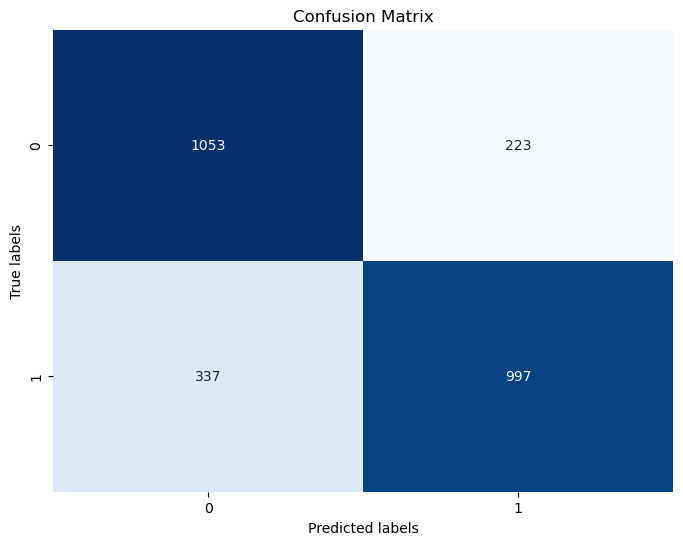

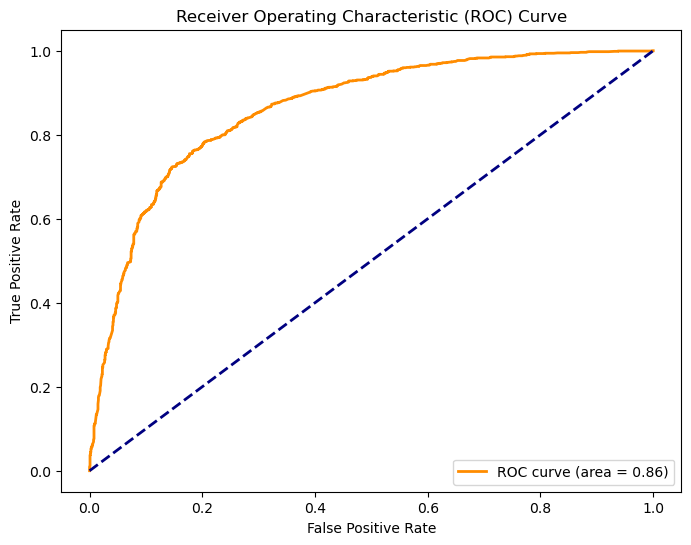

In [49]:
print("\nbone XGBoost:")
evaluate_model(loaded_model_bone, X_bone_train_scaled, y_bone_train, X_bone_test_scaled, y_bone_test)


lung XGBoost:
Train Accuracy: 0.8237347294938918

Test Accuracy: 0.8275020341741253
Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       622
           1       0.83      0.82      0.83       607

    accuracy                           0.83      1229
   macro avg       0.83      0.83      0.83      1229
weighted avg       0.83      0.83      0.83      1229



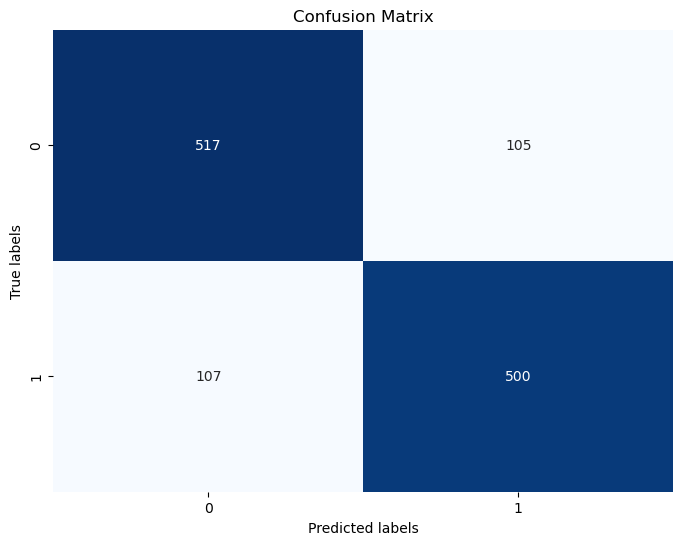

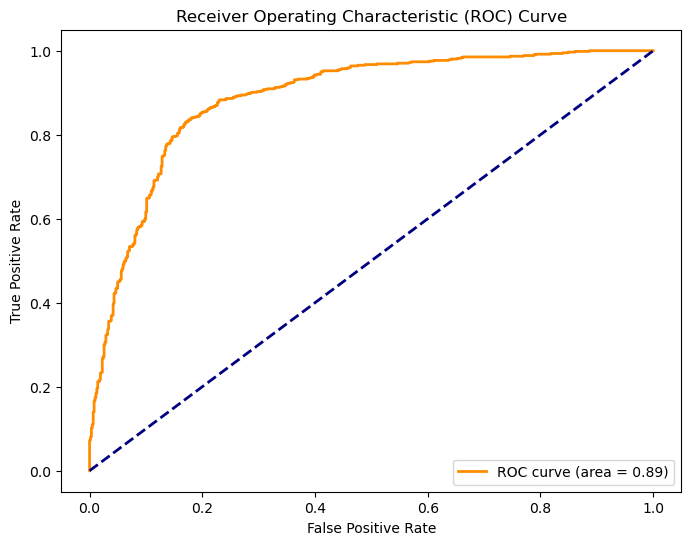

In [50]:
print("\nlung XGBoost:")
evaluate_model(loaded_model_lung, X_lung_train_scaled, y_lung_train, X_lung_test_scaled, y_lung_test)


liver XGBoost:
Train Accuracy: 0.8147094676960586

Test Accuracy: 0.7992424242424242
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       542
           1       0.79      0.80      0.79       514

    accuracy                           0.80      1056
   macro avg       0.80      0.80      0.80      1056
weighted avg       0.80      0.80      0.80      1056



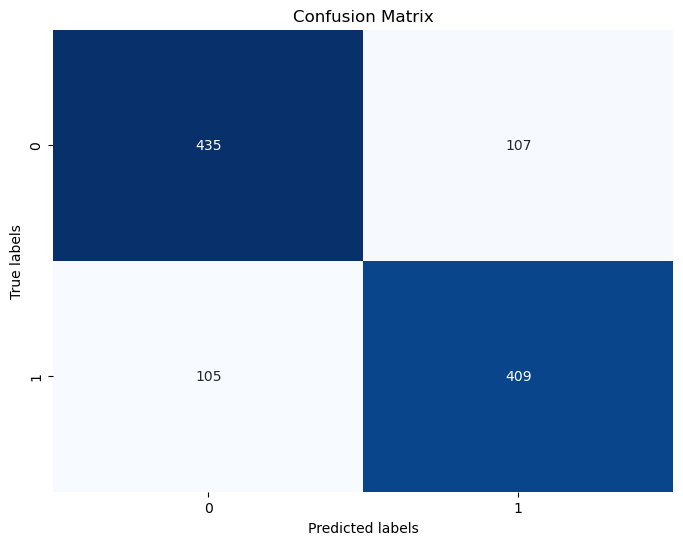

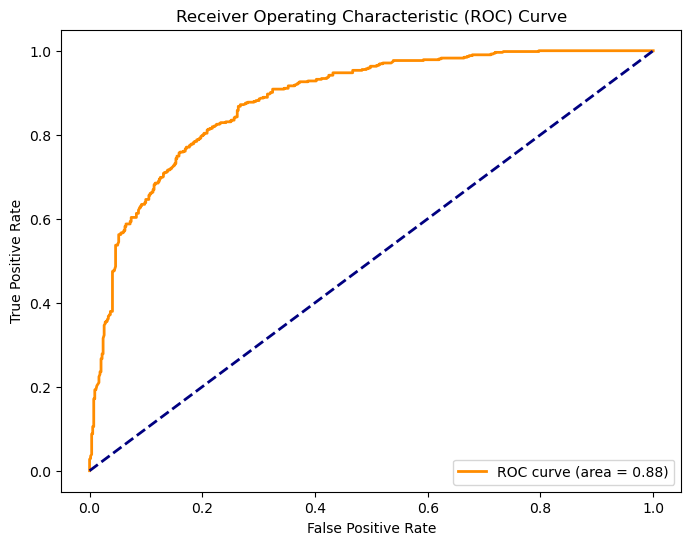

In [51]:
print("\nliver XGBoost:")
evaluate_model(loaded_model_liver, X_liver_train_scaled, y_liver_train,  X_liver_test_scaled, y_liver_test)


brain XGBoost:
Train Accuracy: 0.907051282051282

Test Accuracy: 0.8283582089552238
Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       132
           1       0.83      0.84      0.83       136

    accuracy                           0.83       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.83      0.83      0.83       268



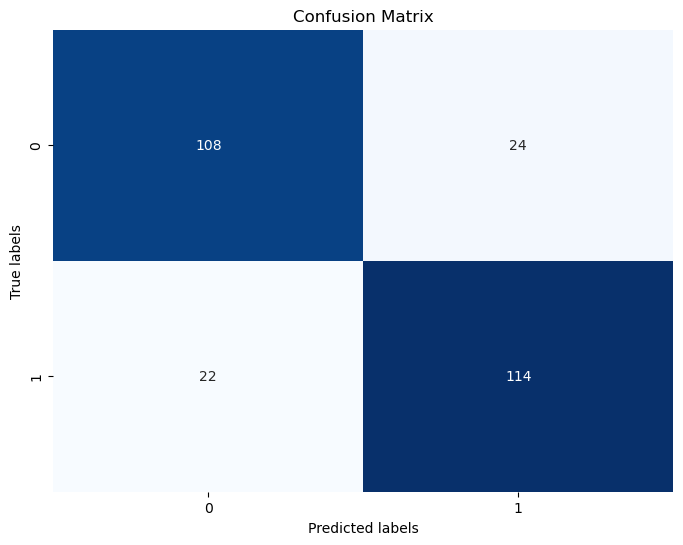

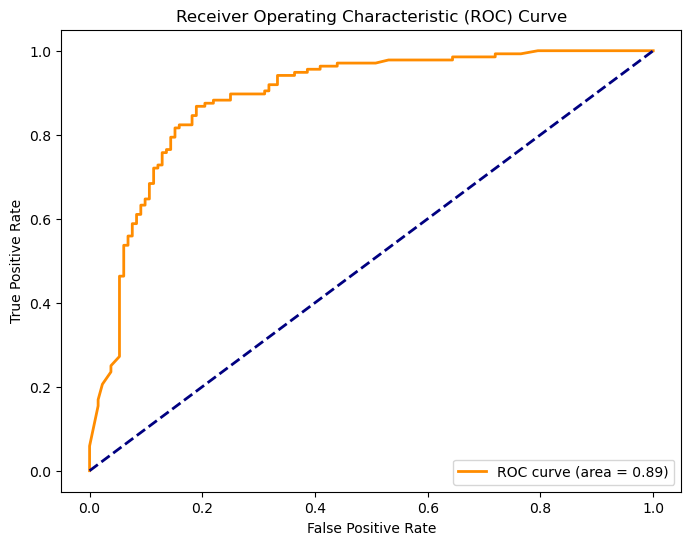

In [52]:
print("\nbrain XGBoost:")
evaluate_model(loaded_model_brain, X_brain_train_scaled, y_brain_train, X_brain_test_scaled, y_brain_test)

# **2. Random Forest Training & Testing**

In [53]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10]
}

def train_and_save_model_RF(X_train_scaled, y_train, save_path):
    # Initialize Random Forest classifier
    model = RandomForestClassifier()
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_result = grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_model = grid_result.best_estimator_
    
    # Train the best model
    best_model.fit(X_train_scaled, y_train)
    
    # Save the best model as .pkl file
    joblib.dump(best_model, save_path)

# Train and save models for each location
train_and_save_model_RF(X_bone_train_scaled, y_bone_train, 'model_bone_rf.pkl')
train_and_save_model_RF(X_lung_train_scaled, y_lung_train, 'model_lung_rf.pkl')
train_and_save_model_RF(X_liver_train_scaled, y_liver_train, 'model_liver_rf.pkl')
train_and_save_model_RF(X_brain_train_scaled, y_brain_train, 'model_brain_rf.pkl')

In [54]:
loaded_model_bone_rf = joblib.load('model_bone_rf.pkl')
loaded_model_lung_rf = joblib.load('model_lung_rf.pkl')
loaded_model_liver_rf = joblib.load('model_liver_rf.pkl')
loaded_model_brain_rf = joblib.load('model_brain_rf.pkl')


bone RF:
Train Accuracy: 0.8394940036142599

Test Accuracy: 0.789272030651341
Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1276
           1       0.82      0.76      0.79      1334

    accuracy                           0.79      2610
   macro avg       0.79      0.79      0.79      2610
weighted avg       0.79      0.79      0.79      2610



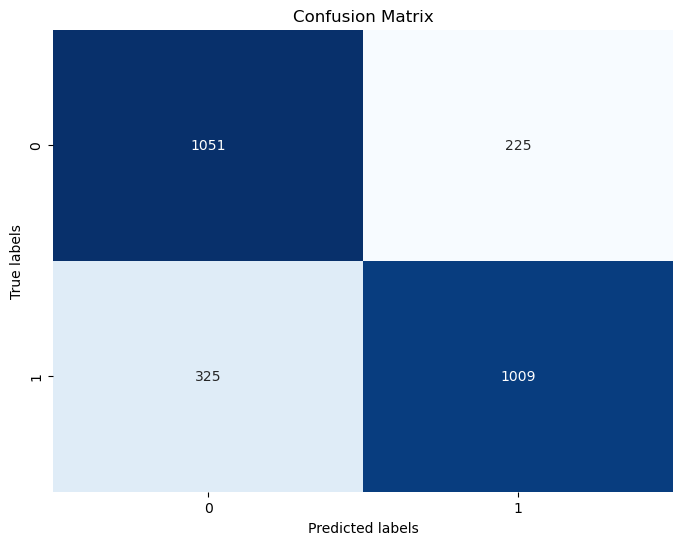

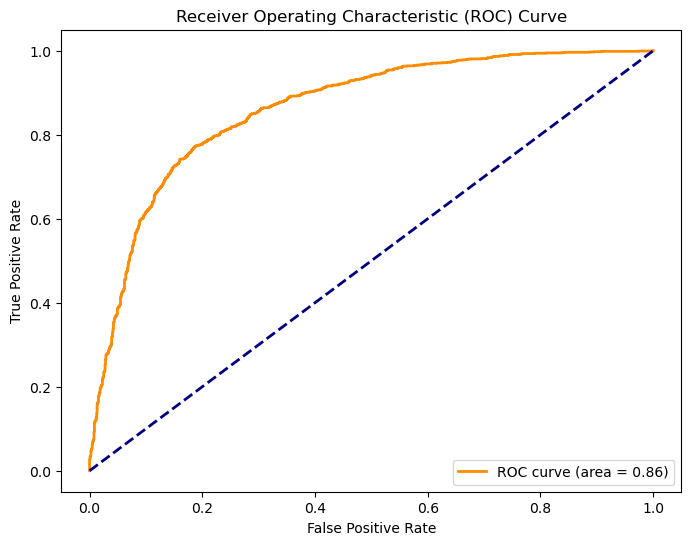

In [55]:
print("\nbone RF:")
evaluate_model(loaded_model_bone_rf, X_bone_train_scaled, y_bone_train, X_bone_test_scaled, y_bone_test)


lung RF:
Train Accuracy: 0.875392670157068

Test Accuracy: 0.8283157038242474
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       622
           1       0.82      0.83      0.83       607

    accuracy                           0.83      1229
   macro avg       0.83      0.83      0.83      1229
weighted avg       0.83      0.83      0.83      1229



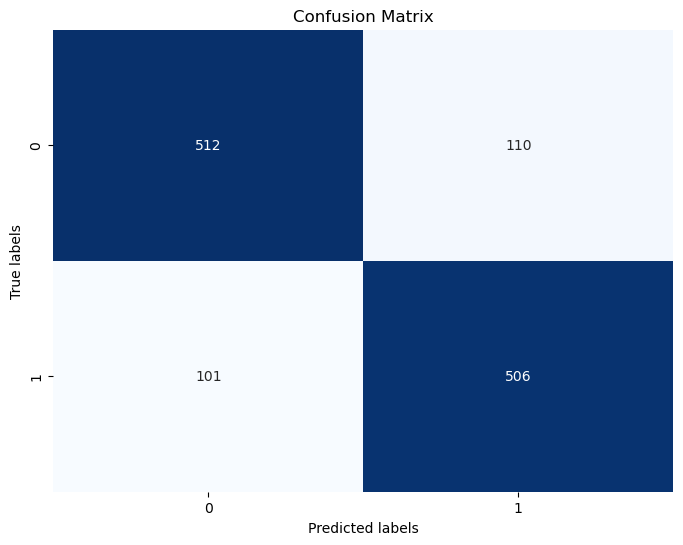

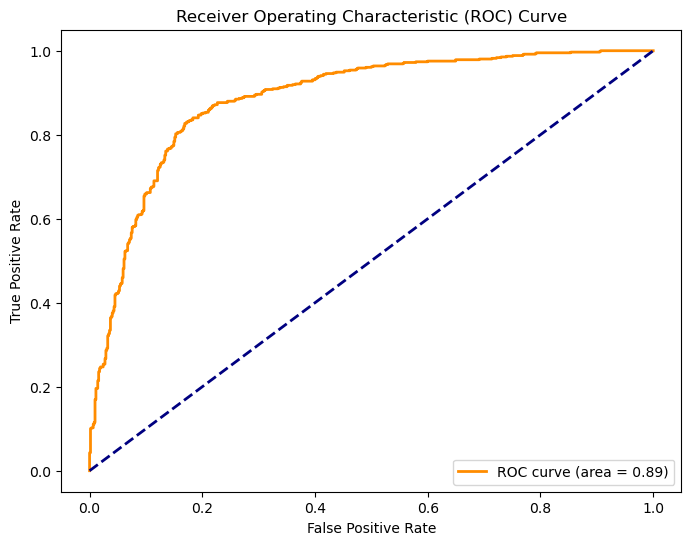

In [56]:
print("\nlung RF:")
evaluate_model(loaded_model_lung_rf, X_lung_train_scaled, y_lung_train, X_lung_test_scaled, y_lung_test)


liver RF:
Train Accuracy: 0.8919138561560341

Test Accuracy: 0.8020833333333334
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       542
           1       0.79      0.80      0.80       514

    accuracy                           0.80      1056
   macro avg       0.80      0.80      0.80      1056
weighted avg       0.80      0.80      0.80      1056



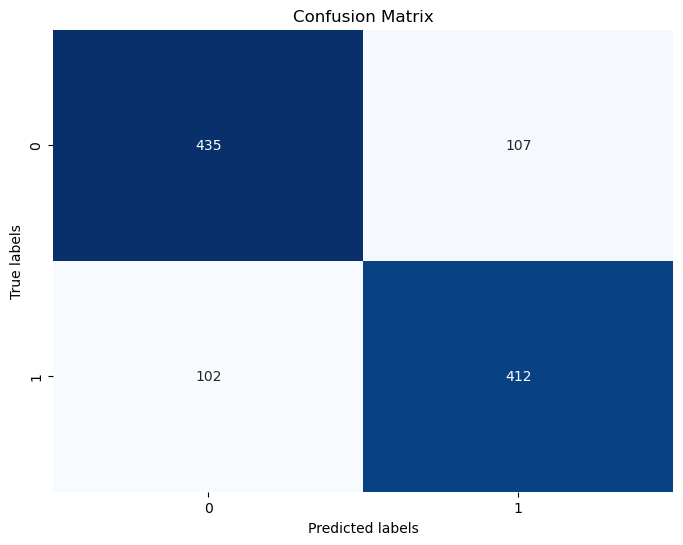

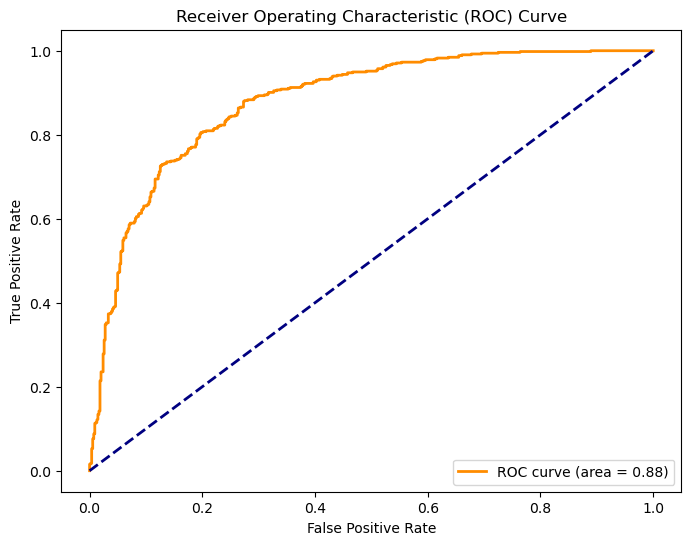

In [57]:
print("\nliver RF:")
evaluate_model(loaded_model_liver_rf, X_liver_train_scaled, y_liver_train,  X_liver_test_scaled, y_liver_test)


brain RF:
Train Accuracy: 0.8669871794871795

Test Accuracy: 0.8507462686567164
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.84       132
           1       0.84      0.88      0.86       136

    accuracy                           0.85       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268



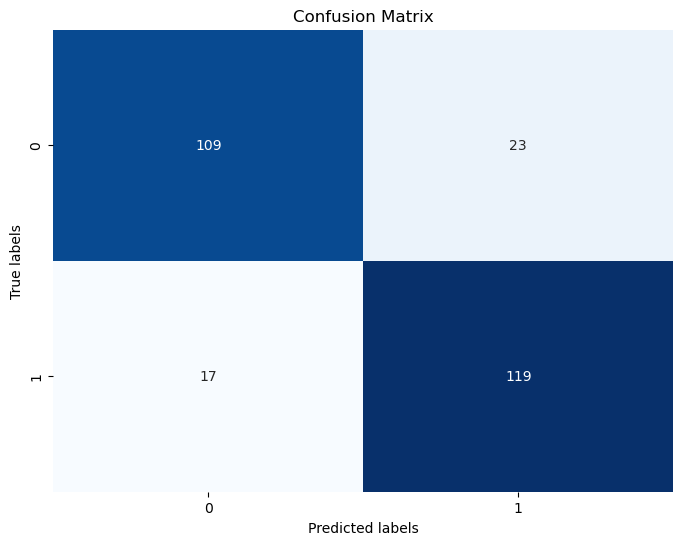

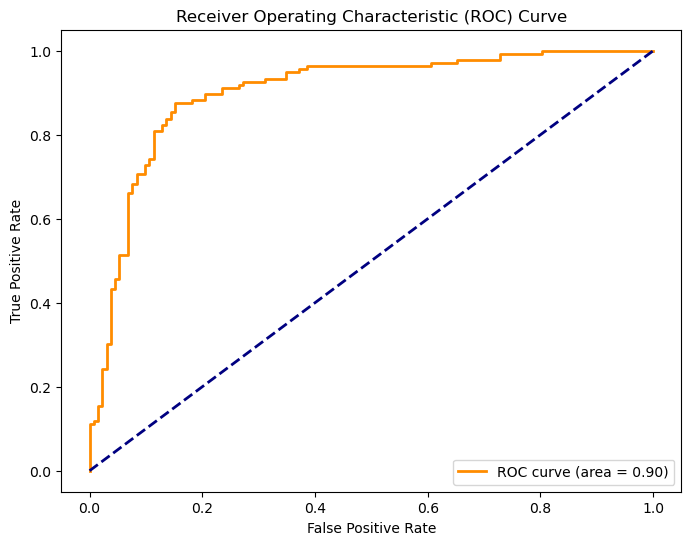

In [58]:
print("\nbrain RF:")
evaluate_model(loaded_model_brain_rf, X_brain_train_scaled, y_brain_train, X_brain_test_scaled, y_brain_test)

# **3. SVM Training & Testing**

In [59]:
def train_and_save_model_SVM(X_train_scaled, y_train, save_path):
    # Initialize Support Vector Machine (SVM) classifier with default parameters
    model = SVC(probability=True)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Save the model as .pkl file
    joblib.dump(model, save_path)

# Train and save models for each location
train_and_save_model_SVM(X_bone_train_scaled, y_bone_train, 'model_bone_SV.pkl')
train_and_save_model_SVM(X_lung_train_scaled, y_lung_train, 'model_lung_SV.pkl')
train_and_save_model_SVM(X_liver_train_scaled, y_liver_train, 'model_liver_SV.pkl')
train_and_save_model_SVM(X_brain_train_scaled, y_brain_train, 'model_brain_SV.pkl')


In [60]:
loaded_model_bone_SV = joblib.load('model_bone_SV.pkl')
loaded_model_lung_SV = joblib.load('model_lung_SV.pkl')
loaded_model_liver_SV = joblib.load('model_liver_SV.pkl')
loaded_model_brain_SV = joblib.load('model_brain_SV.pkl')


bone SVM:
Train Accuracy: 0.8026942664695252

Test Accuracy: 0.7888888888888889
Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1276
           1       0.82      0.76      0.79      1334

    accuracy                           0.79      2610
   macro avg       0.79      0.79      0.79      2610
weighted avg       0.79      0.79      0.79      2610



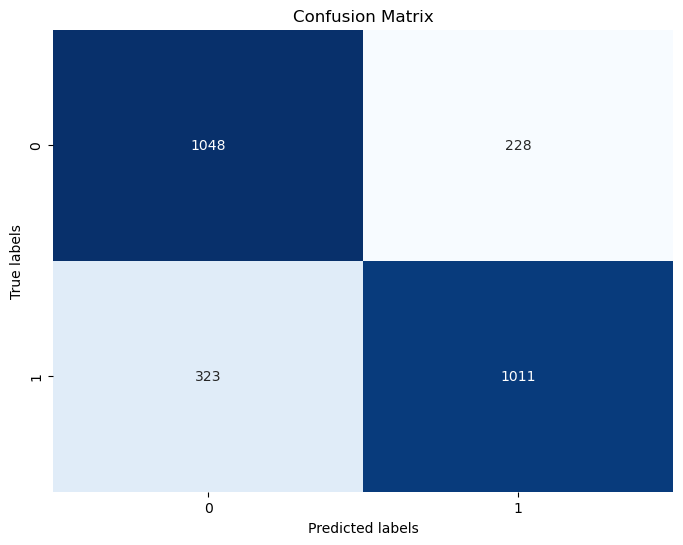

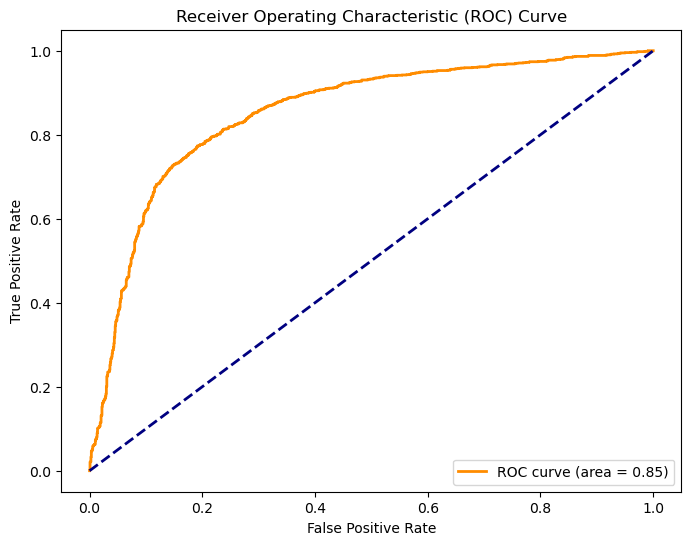

In [61]:
print("\nbone SVM:")
evaluate_model(loaded_model_bone_SV, X_bone_train_scaled, y_bone_train, X_bone_test_scaled, y_bone_test)


lung SVM:
Train Accuracy: 0.8254799301919721

Test Accuracy: 0.8242473555736372
Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       622
           1       0.82      0.82      0.82       607

    accuracy                           0.82      1229
   macro avg       0.82      0.82      0.82      1229
weighted avg       0.82      0.82      0.82      1229



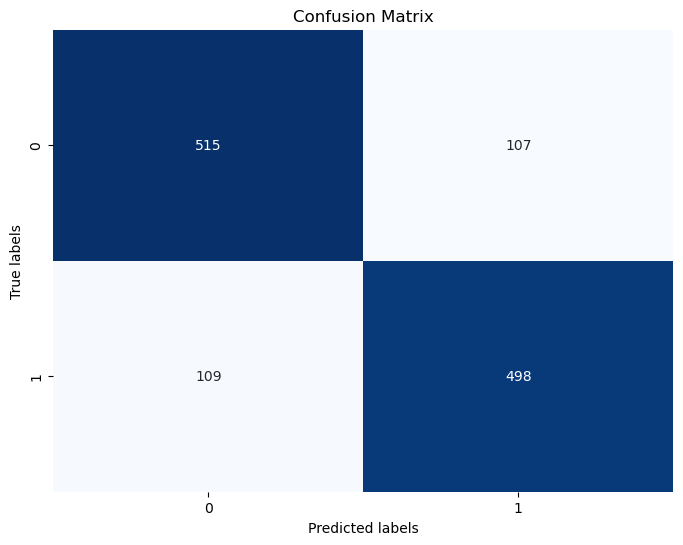

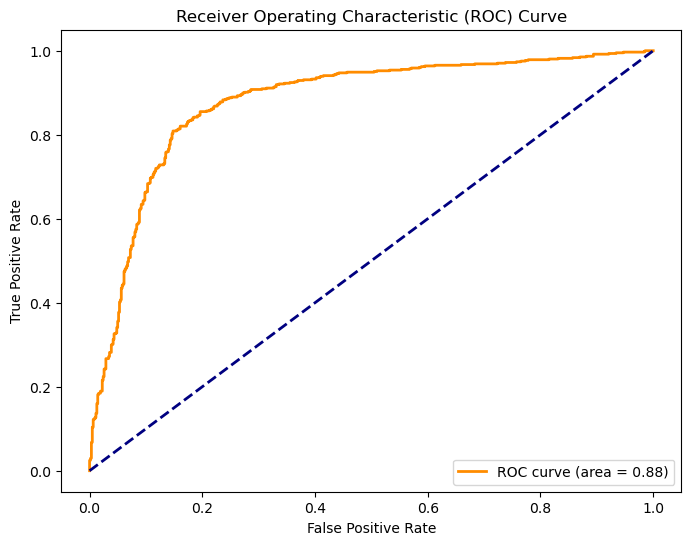

In [62]:
print("\nlung SVM:")
evaluate_model(loaded_model_lung_SV, X_lung_train_scaled, y_lung_train, X_lung_test_scaled, y_lung_test)


liver SVM:
Train Accuracy: 0.8264932954083706

Test Accuracy: 0.7964015151515151
Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       542
           1       0.79      0.79      0.79       514

    accuracy                           0.80      1056
   macro avg       0.80      0.80      0.80      1056
weighted avg       0.80      0.80      0.80      1056



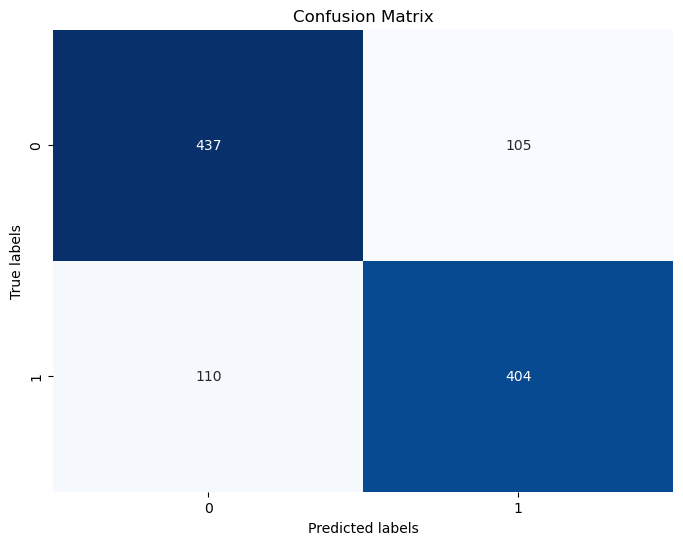

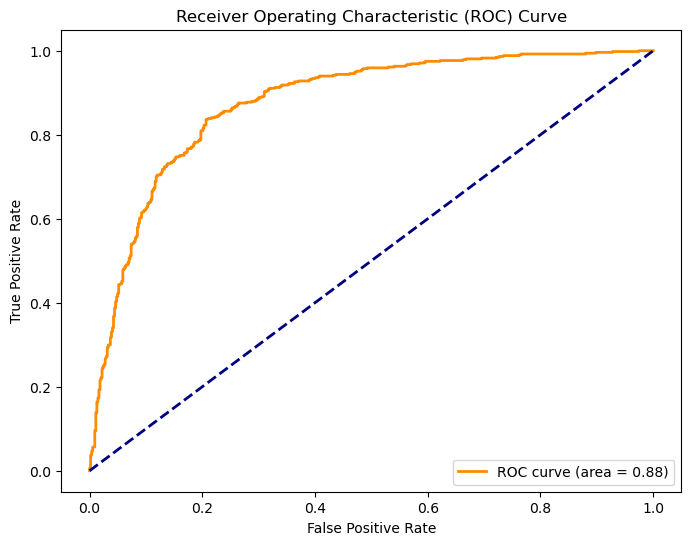

In [63]:
print("\nliver SVM:")
evaluate_model(loaded_model_liver_SV, X_liver_train_scaled, y_liver_train,  X_liver_test_scaled, y_liver_test)


brain SVM:
Train Accuracy: 0.8814102564102564

Test Accuracy: 0.8507462686567164
Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       132
           1       0.85      0.86      0.85       136

    accuracy                           0.85       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268



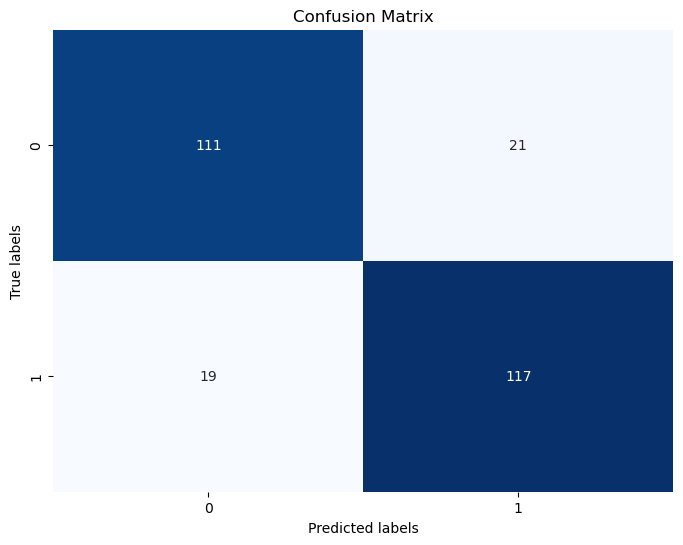

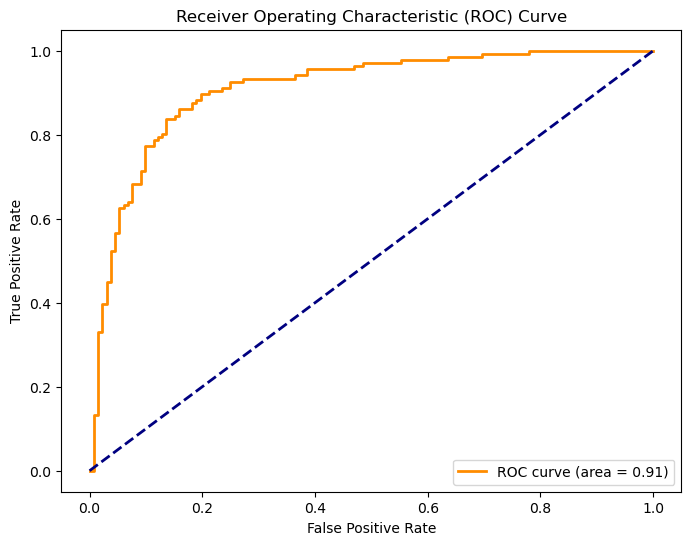

In [64]:
print("\nbrain SVM:")
evaluate_model(loaded_model_brain_SV, X_brain_train_scaled, y_brain_train, X_brain_test_scaled, y_brain_test)

# **4. LGB Training**

In [65]:
param_grid_lgb = {
    'n_estimators': [100, 200, 300, 500, 700],
    'max_depth': [10, 20, 30],  # Increase max_depth
    'learning_rate': [0.01, 0.05, 0.1]
}

def preprocess_feature_names(X):
    X.columns = [col.replace(' ', '_') for col in X.columns]
    return X

def train_and_save_model_LGBM(X_train_scaled, y_train, save_path):
    # Preprocess feature names
    X_train_scaled = preprocess_feature_names(X_train_scaled)
    
    model = lgb.LGBMClassifier()
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid_lgb, cv=3)
    grid_result = grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_model = grid_result.best_estimator_
    
    # Train the best model
    best_model.fit(X_train_scaled, y_train)
    
    # Save the best model as .pkl file
    joblib.dump(best_model, save_path)

# Train and save models for each location
train_and_save_model_LGBM(X_bone_train_scaled, y_bone_train, 'model_bone_lgbm.pkl')
train_and_save_model_LGBM(X_lung_train_scaled, y_lung_train, 'model_lung_lgbm.pkl')
train_and_save_model_LGBM(X_liver_train_scaled, y_liver_train, 'model_liver_lgbm.pkl')
train_and_save_model_LGBM(X_brain_train_scaled, y_brain_train, 'model_brain_lgbm.pkl')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2074, number of negative: 1984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 4058, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511089 -> initscore=0.044364
[LightGBM] [Info] Start training from score 0.044364
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't 

In [66]:
loaded_model_bone_LGBM = joblib.load('model_bone_lgbm.pkl')
loaded_model_lung_LGBM = joblib.load('model_lung_lgbm.pkl')
loaded_model_liver_LGBM = joblib.load('model_liver_lgbm.pkl')
loaded_model_brain_LGBM = joblib.load('model_brain_lgbm.pkl')


bone LGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train Accuracy: 0.8059799572860193
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Test Accuracy: 0.7873563218390804
Test Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1276
           1       0.82      0.75      0.78      1334

    accuracy                           0.79      2610
   macro avg       0.79      0.79      0.79      2610
weighted avg       0.79      0.79      0.79      2610



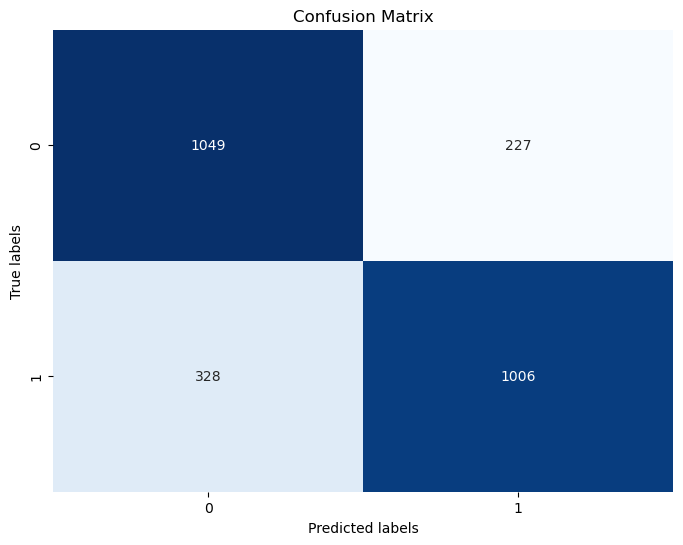

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


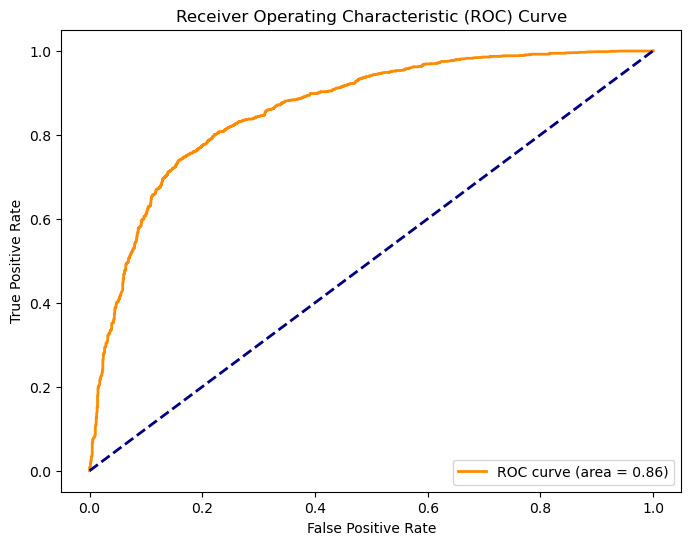

In [67]:
print("\nbone LGBM:")
evaluate_model(loaded_model_bone_LGBM, X_bone_train_scaled, y_bone_train, X_bone_test_scaled, y_bone_test)

\Lung LGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train Accuracy: 0.8338568935427574
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Test Accuracy: 0.8340113913751017
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       622
           1       0.83      0.84      0.83       607

    accuracy                           0.83      1229
   macro avg       0.83      0.83      0.83      1229
weighted avg       0.83      0.83      0.83      1229



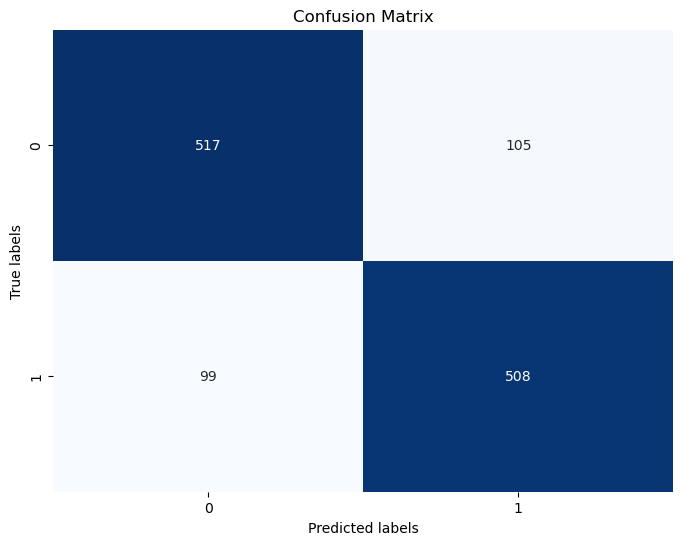

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


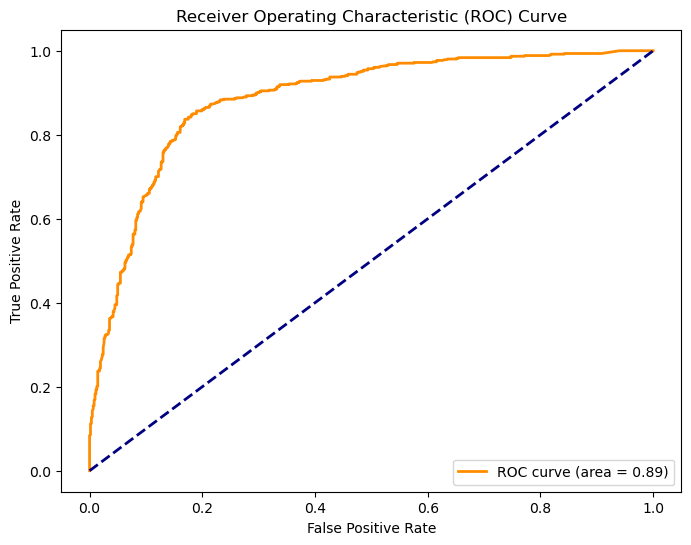

In [68]:
print("\Lung LGBM:")
evaluate_model(loaded_model_lung_LGBM, X_lung_train_scaled, y_lung_train, X_lung_test_scaled, y_lung_test)


liver LGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train Accuracy: 0.8273059731816335
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Test Accuracy: 0.7973484848484849
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       542
           1       0.78      0.81      0.79       514

    accuracy                           0.80      1056
   macro avg       0.80      0.80      0.80      1056
weighted avg       0.80      0.80      0.80      1056



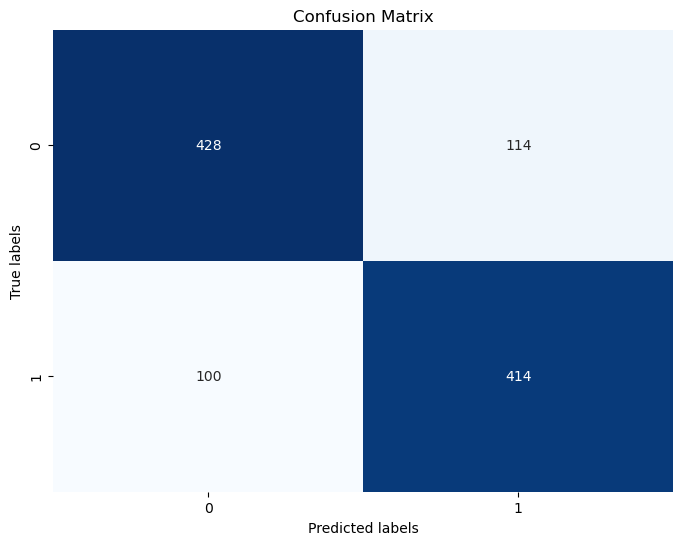

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


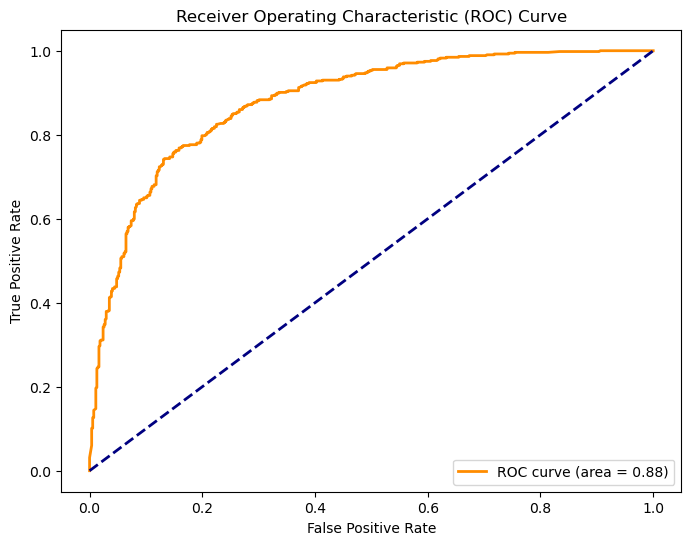

In [69]:
print("\nliver LGBM:")
evaluate_model(loaded_model_liver_LGBM, X_liver_train_scaled, y_liver_train, X_liver_test_scaled, y_liver_test)


brain LGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train Accuracy: 0.9006410256410257
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Test Accuracy: 0.8171641791044776
Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       132
           1       0.81      0.83      0.82       136

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



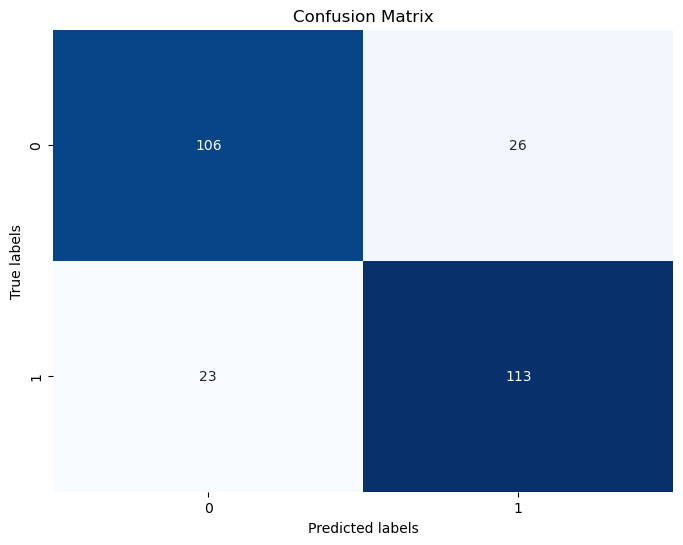

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


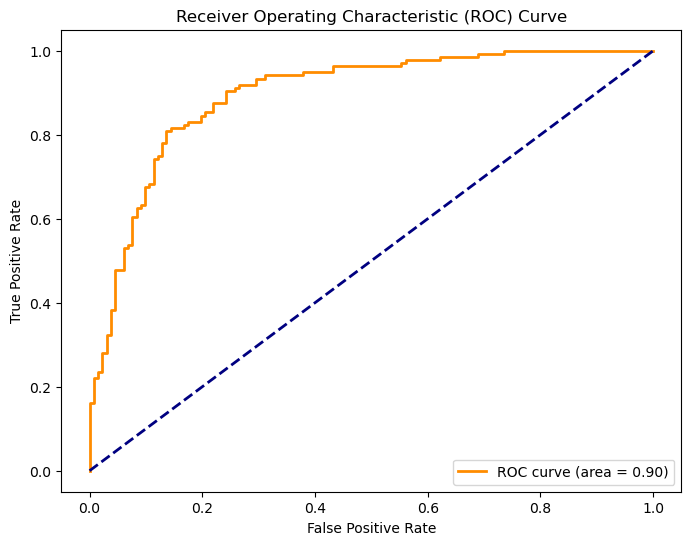

In [70]:
print("\nbrain LGBM:")
evaluate_model(loaded_model_brain_LGBM, X_brain_train_scaled, y_brain_train, X_brain_test_scaled, y_brain_test)

# ______________________________________________________________
## **5. Subset Validation**

In [71]:
X_val_bone_seer = validation_bone.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_bone_seer = validation_bone['Bone_metastasis']

X_val_liver_seer = validation_liver.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_liver_seer = validation_liver['Liver_metastasis']

X_val_lung_seer = validation_lung.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_lung_seer = validation_lung['Lung_metastasis']

X_val_brain_seer = validation_brain.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_brain_seer = validation_brain['Brain_metastasis']

In [72]:
X_val_bone_seer = one_hot_encode_columns(X_val_bone_seer, columns_to_encode)
X_val_liver_seer = one_hot_encode_columns(X_val_liver_seer, columns_to_encode)
X_val_lung_seer = one_hot_encode_columns(X_val_lung_seer, columns_to_encode)
X_val_brain_seer = one_hot_encode_columns(X_val_brain_seer, columns_to_encode)

In [73]:
X_val_brain_seer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 100735 to 17311
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Overall Survival Status (Month)  382 non-null    float64
 1   Age_25-29 years                  382 non-null    bool   
 2   Age_30-34 years                  382 non-null    bool   
 3   Age_35-39 years                  382 non-null    bool   
 4   Age_40-44 years                  382 non-null    bool   
 5   Age_45-49 years                  382 non-null    bool   
 6   Age_50-54 years                  382 non-null    bool   
 7   Age_55-59 years                  382 non-null    bool   
 8   Age_60-64 years                  382 non-null    bool   
 9   Age_65-69 years                  382 non-null    bool   
 10  Age_70-74 years                  382 non-null    bool   
 11  Age_80-84 years                  382 non-null    bool   
 12  Tumor Grade_I       

In [74]:
# solve brain problem of unfound values
#size = X_val_brain_seer.columns.get_loc('Tumor Size_T1')
#X_val_brain_seer.insert(size,'Tumor Size_T0', 0)

#age = X_val_brain_seer.columns.get_loc('Age_30-34 years')
#X_val_brain_seer.insert(age,'Age_25-29 years', 0)


In [75]:
y_val_bone_seer = label_encoder_bone.transform(y_val_bone_seer)
y_val_liver_seer = label_encoder_liver.transform(y_val_liver_seer)
y_val_lung_seer = label_encoder_lung.transform(y_val_lung_seer)
y_val_brain_seer = label_encoder_brain.transform(y_val_brain_seer)

In [76]:
X_val_bone_scaled = X_val_bone_seer.copy()
X_val_bone_scaled['Overall Survival Status (Month)'] = scaler_bone.transform(X_val_bone_scaled[['Overall Survival Status (Month)']])

X_val_liver_scaled = X_val_liver_seer.copy()
X_val_liver_scaled['Overall Survival Status (Month)'] = scaler_liver.transform(X_val_liver_scaled[['Overall Survival Status (Month)']])

X_val_lung_scaled = X_val_lung_seer.copy()
X_val_lung_scaled['Overall Survival Status (Month)'] = scaler_lung.transform(X_val_lung_scaled[['Overall Survival Status (Month)']])

X_val_brain_scaled = X_val_brain_seer.copy()
X_val_brain_scaled['Overall Survival Status (Month)'] = scaler_brain.transform(X_val_brain_scaled[['Overall Survival Status (Month)']])

In [77]:
def validate_model(model, X_val, y_val):

    y_pred = model.predict(X_val)
    Val_acc = accuracy_score(y_val, y_pred)
    Val_report = classification_report(y_val, y_pred)
    print("\nVal Accuracy:", Val_acc)
    print("Val Classification Report:")
    print(Val_report)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate ROC-AUC
    y_prob = model.predict_proba(X_val)[:, 1]  # Probability estimates of the positive class
    roc_auc = roc_auc_score(y_val, y_prob)
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# **XGBoost**


Bone XGBoost:

Val Accuracy: 0.7843347639484979
Val Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1899
           1       0.80      0.74      0.77      1829

    accuracy                           0.78      3728
   macro avg       0.79      0.78      0.78      3728
weighted avg       0.79      0.78      0.78      3728



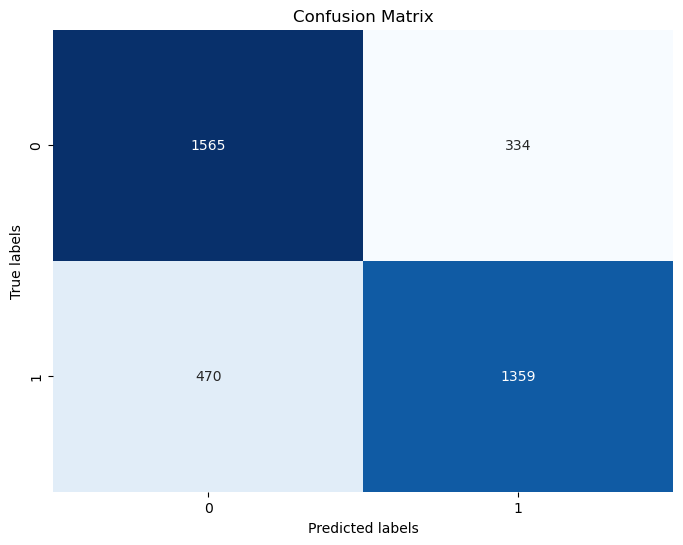

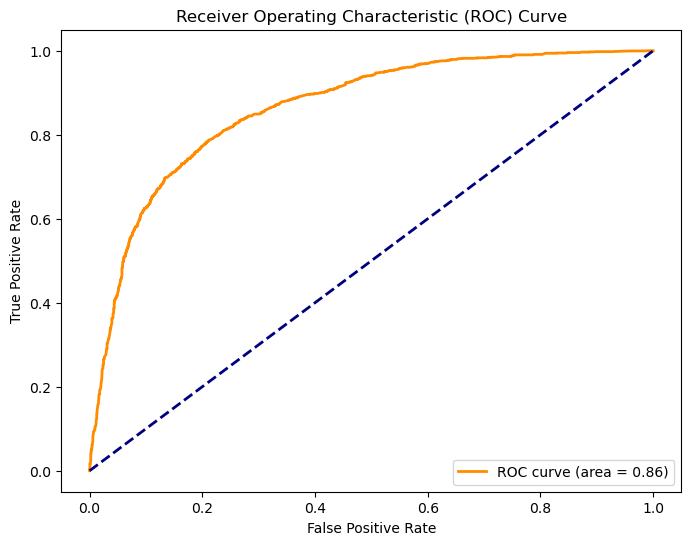

In [78]:
print("\nBone XGBoost:")
validate_model(loaded_model_bone, X_val_bone_scaled,y_val_bone_seer)

In [79]:
#X_val_liver_scaled = X_val_liver_scaled.drop(columns=['Tumor Size_T0'],axis=1)


Liver XGBoost:

Val Accuracy: 0.7970822281167109
Val Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       793
           1       0.78      0.79      0.79       715

    accuracy                           0.80      1508
   macro avg       0.80      0.80      0.80      1508
weighted avg       0.80      0.80      0.80      1508



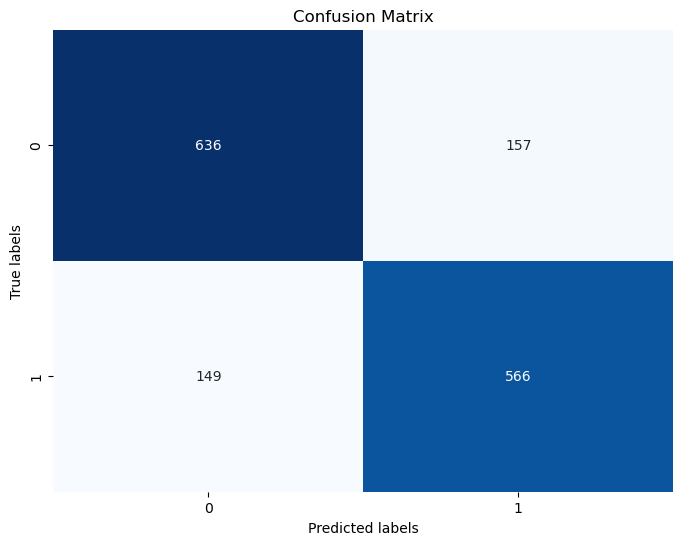

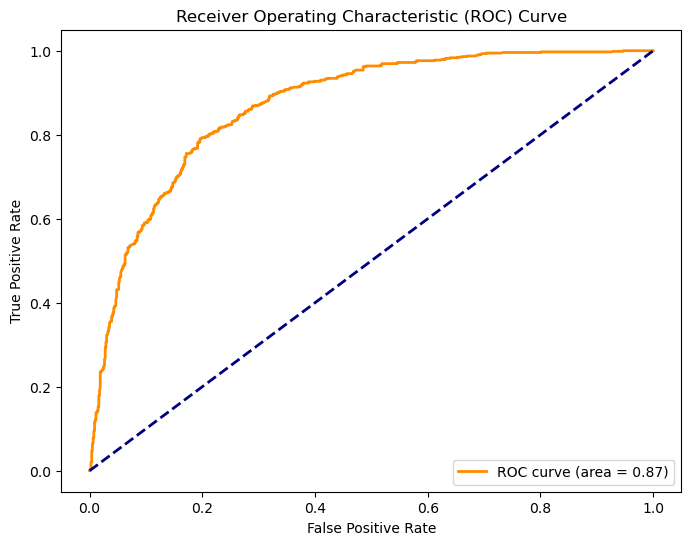

In [80]:
print("\nLiver XGBoost:")
validate_model(loaded_model_liver,X_val_liver_scaled ,y_val_liver_seer)


Lung XGBoost:

Val Accuracy: 0.8072976054732041
Val Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       928
           1       0.78      0.81      0.80       826

    accuracy                           0.81      1754
   macro avg       0.81      0.81      0.81      1754
weighted avg       0.81      0.81      0.81      1754



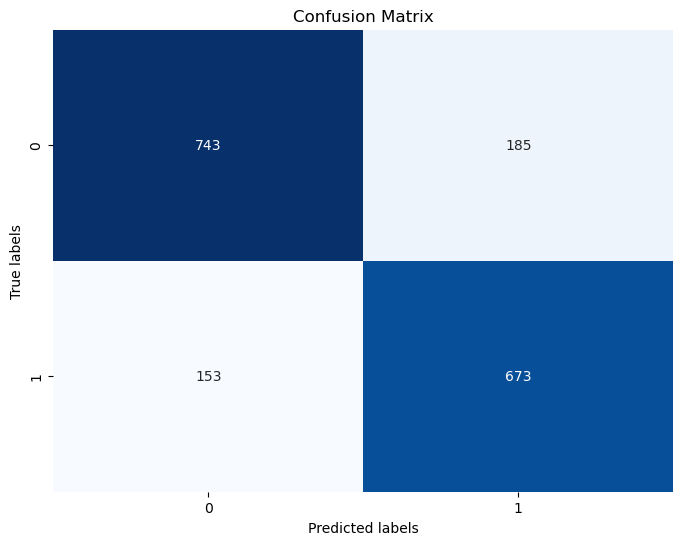

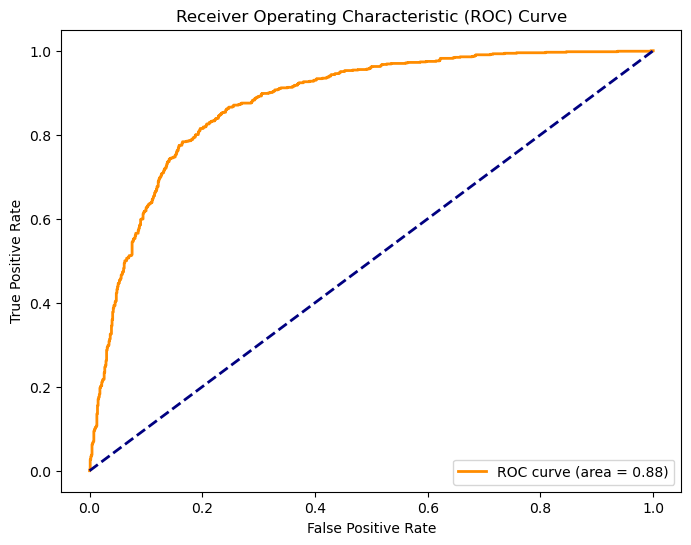

In [81]:
print("\nLung XGBoost:")
validate_model(loaded_model_lung,X_val_lung_scaled ,y_val_lung_seer)

In [82]:
X_val_brain_scaled = X_val_brain_scaled.drop(columns=['Tumor Size_T0'],axis=1)


Brain XGBoost:

Val Accuracy: 0.8586387434554974
Val Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       208
           1       0.85      0.84      0.84       174

    accuracy                           0.86       382
   macro avg       0.86      0.86      0.86       382
weighted avg       0.86      0.86      0.86       382



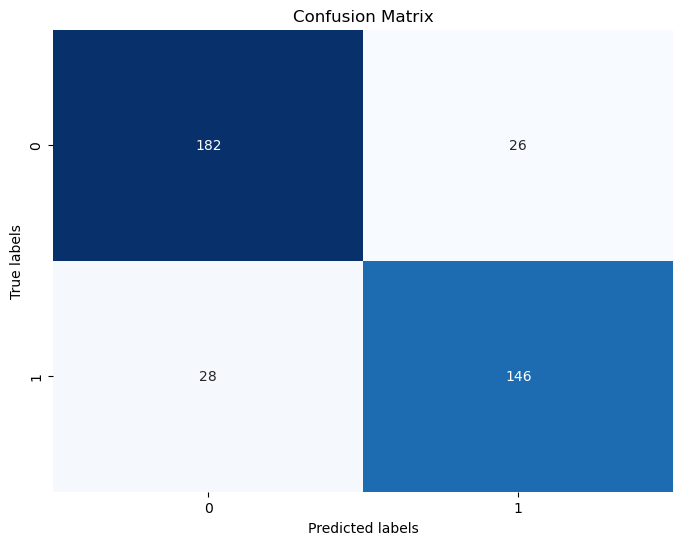

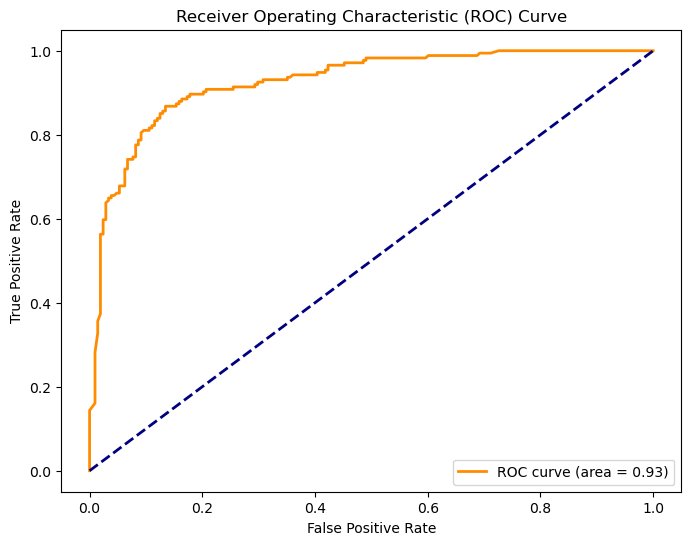

In [83]:
print("\nBrain XGBoost:")
validate_model(loaded_model_brain,X_val_brain_scaled ,y_val_brain_seer)

# **RF**


Bone RF:

Val Accuracy: 0.785675965665236
Val Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1899
           1       0.80      0.75      0.77      1829

    accuracy                           0.79      3728
   macro avg       0.79      0.78      0.79      3728
weighted avg       0.79      0.79      0.79      3728



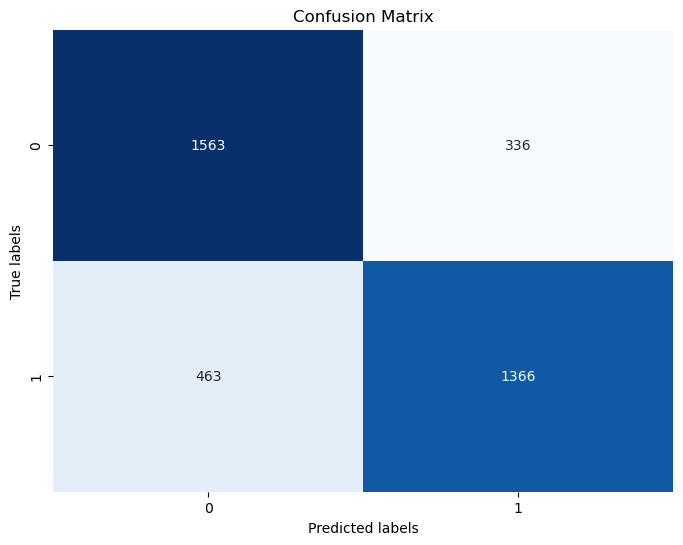

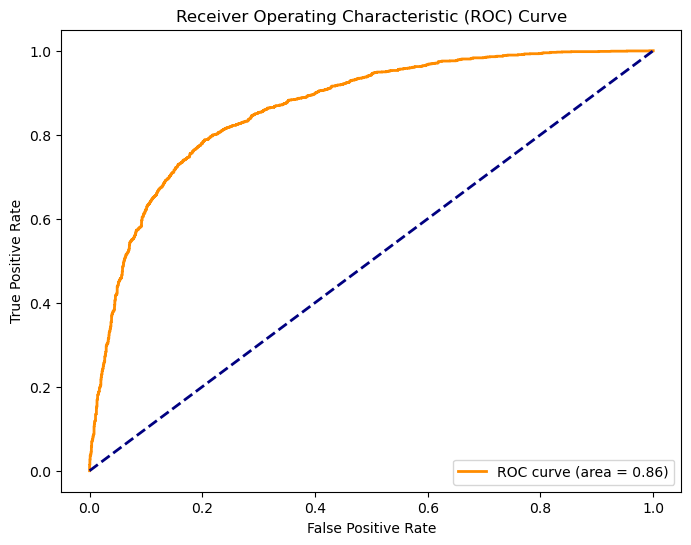

In [84]:
print("\nBone RF:")
validate_model(loaded_model_bone_rf, X_val_bone_scaled,y_val_bone_seer)


liver RF:

Val Accuracy: 0.7931034482758621
Val Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       793
           1       0.77      0.80      0.79       715

    accuracy                           0.79      1508
   macro avg       0.79      0.79      0.79      1508
weighted avg       0.79      0.79      0.79      1508



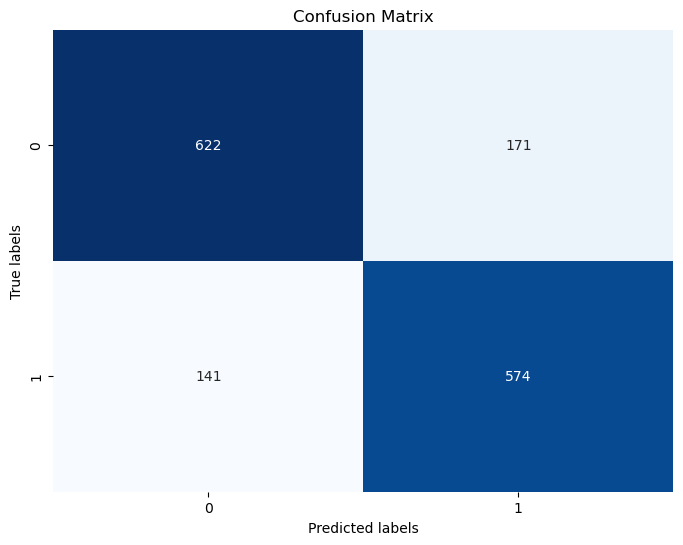

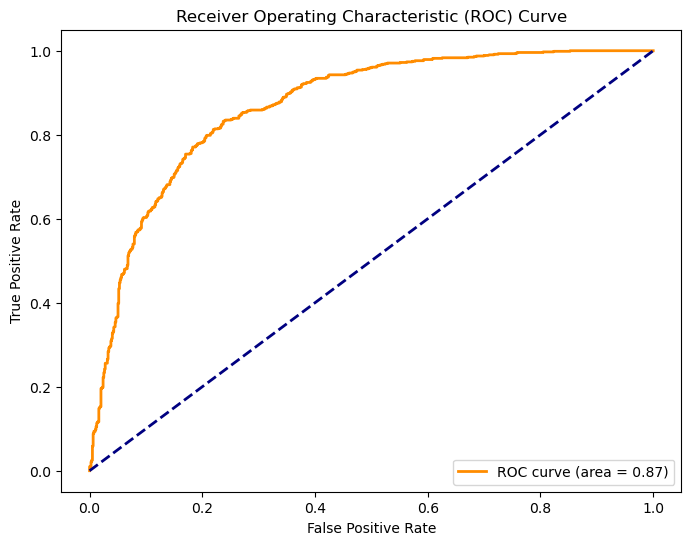

In [85]:
print("\nliver RF:")
validate_model(loaded_model_liver_rf, X_val_liver_scaled,y_val_liver_seer)


lung RF:

Val Accuracy: 0.8027366020524516
Val Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       928
           1       0.78      0.82      0.80       826

    accuracy                           0.80      1754
   macro avg       0.80      0.80      0.80      1754
weighted avg       0.80      0.80      0.80      1754



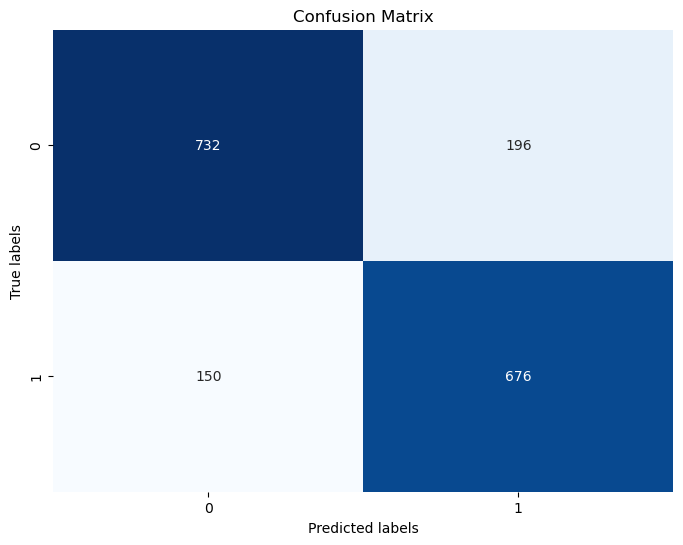

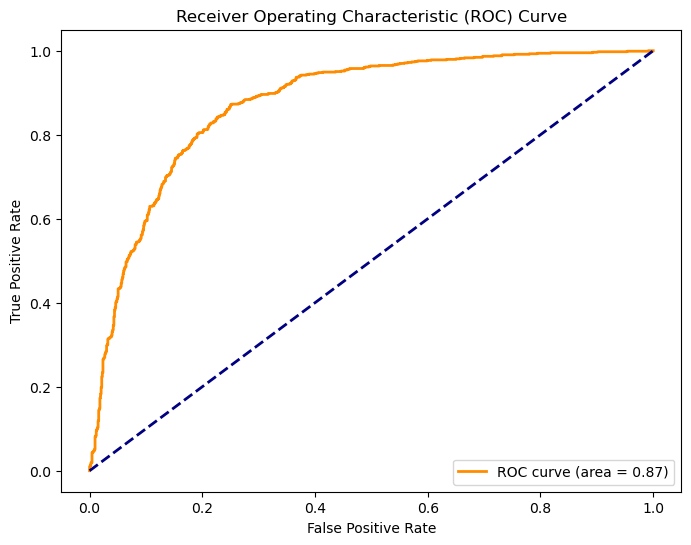

In [86]:
print("\nlung RF:")
validate_model(loaded_model_lung_rf, X_val_lung_scaled,y_val_lung_seer)


brain RF:

Val Accuracy: 0.8664921465968587
Val Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       208
           1       0.84      0.88      0.86       174

    accuracy                           0.87       382
   macro avg       0.87      0.87      0.87       382
weighted avg       0.87      0.87      0.87       382



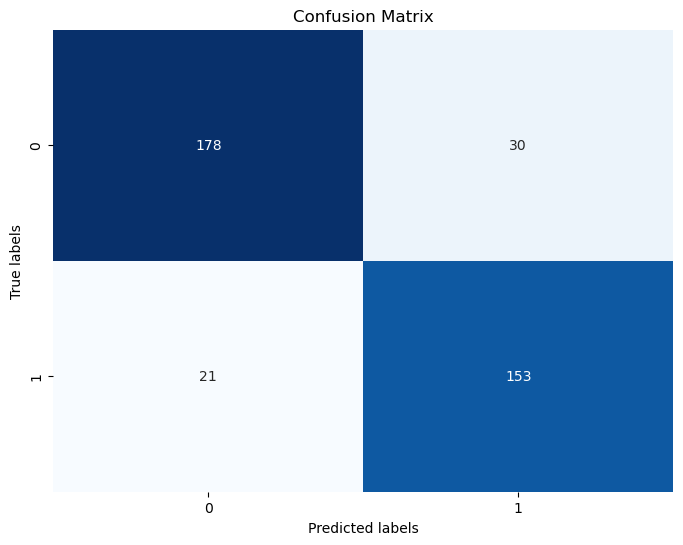

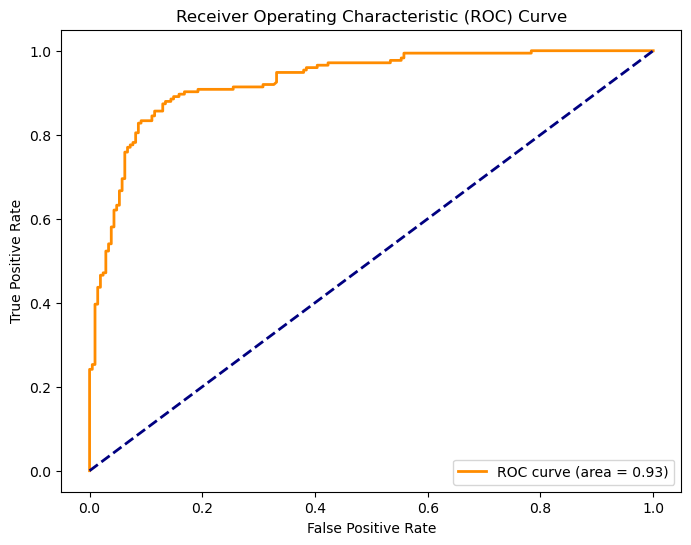

In [87]:
print("\nbrain RF:")
validate_model(loaded_model_brain_rf, X_val_brain_scaled,y_val_brain_seer)

# **SVM**


bone SVM:

Val Accuracy: 0.7870171673819742
Val Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1899
           1       0.80      0.75      0.78      1829

    accuracy                           0.79      3728
   macro avg       0.79      0.79      0.79      3728
weighted avg       0.79      0.79      0.79      3728



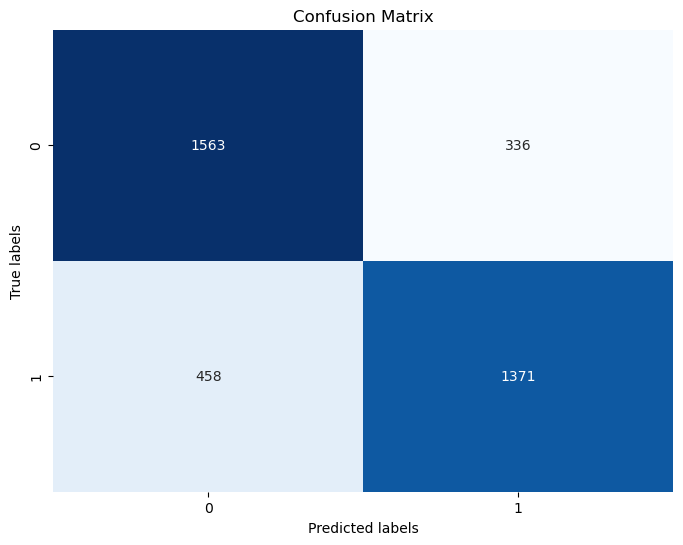

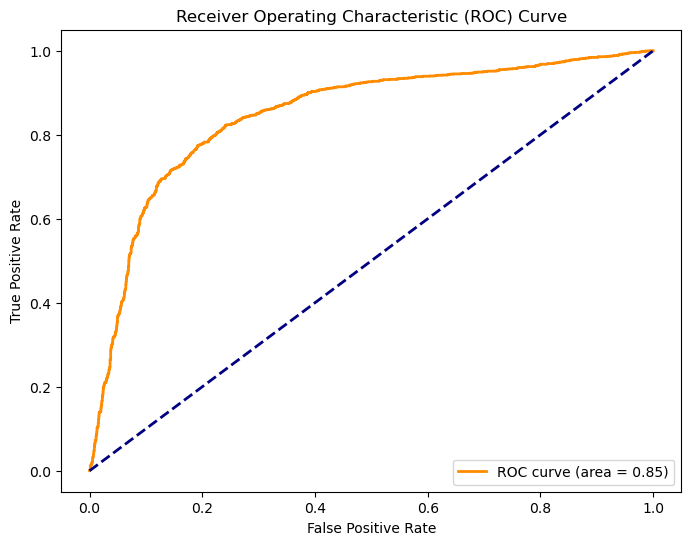

In [88]:
print("\nbone SVM:")
validate_model(loaded_model_bone_SV, X_val_bone_scaled,y_val_bone_seer)


liver SVM:

Val Accuracy: 0.7897877984084881
Val Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       793
           1       0.77      0.80      0.78       715

    accuracy                           0.79      1508
   macro avg       0.79      0.79      0.79      1508
weighted avg       0.79      0.79      0.79      1508



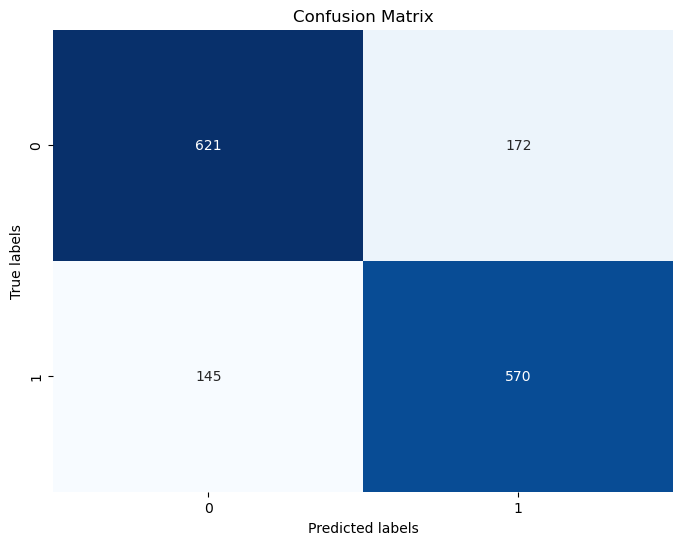

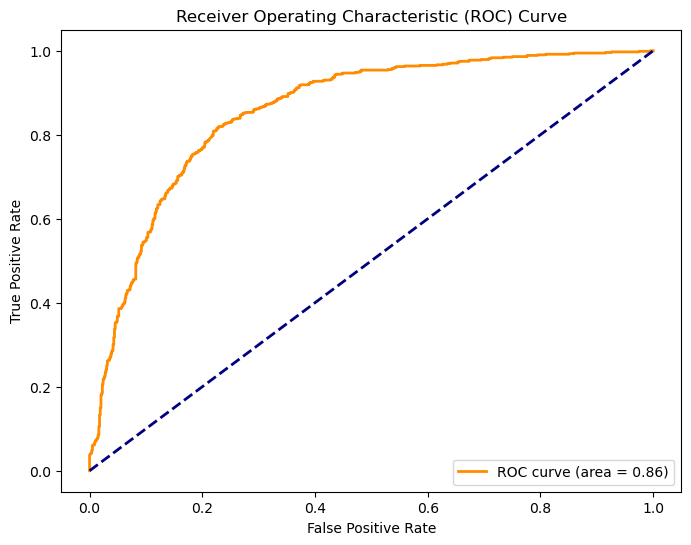

In [89]:
print("\nliver SVM:")
validate_model(loaded_model_liver_SV, X_val_liver_scaled,y_val_liver_seer)


lung SVM:

Val Accuracy: 0.8084378563283923
Val Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       928
           1       0.78      0.82      0.80       826

    accuracy                           0.81      1754
   macro avg       0.81      0.81      0.81      1754
weighted avg       0.81      0.81      0.81      1754



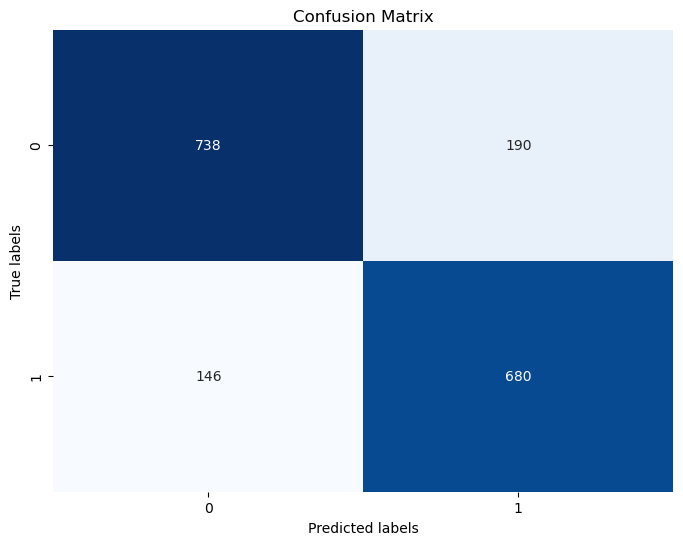

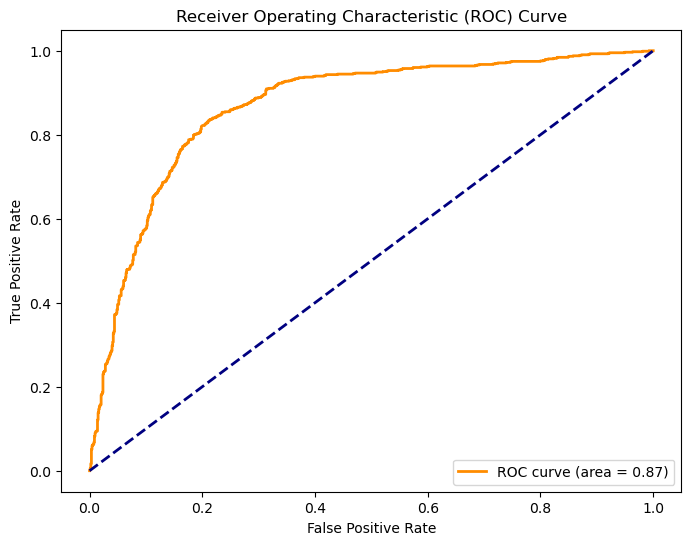

In [90]:
print("\nlung SVM:")
validate_model(loaded_model_lung_SV, X_val_lung_scaled,y_val_lung_seer)


brain SVM:

Val Accuracy: 0.8717277486910995
Val Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       208
           1       0.86      0.86      0.86       174

    accuracy                           0.87       382
   macro avg       0.87      0.87      0.87       382
weighted avg       0.87      0.87      0.87       382



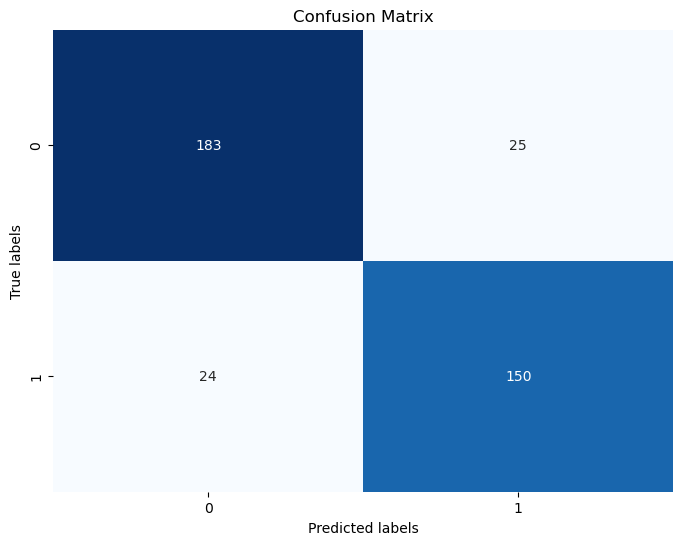

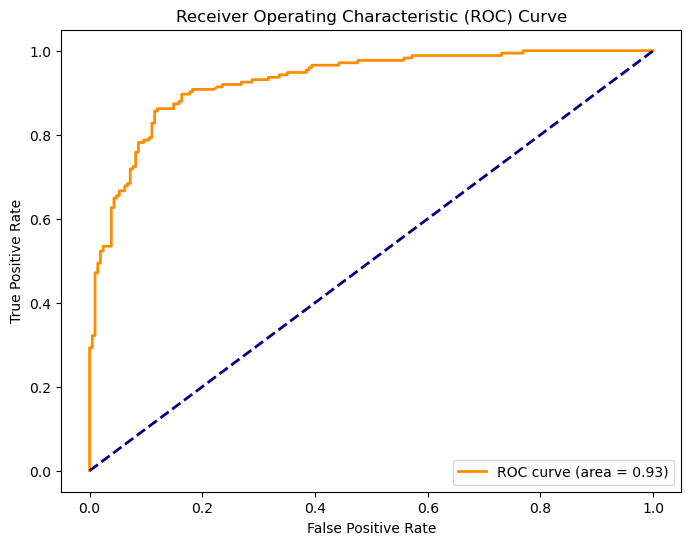

In [91]:
print("\nbrain SVM:")
validate_model(loaded_model_brain_SV, X_val_brain_scaled,y_val_brain_seer)

# **LGBM**


bone LGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Val Accuracy: 0.7862124463519313
Val Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1899
           1       0.80      0.76      0.78      1829

    accuracy                           0.79      3728
   macro avg       0.79      0.79      0.79      3728
weighted avg       0.79      0.79      0.79      3728



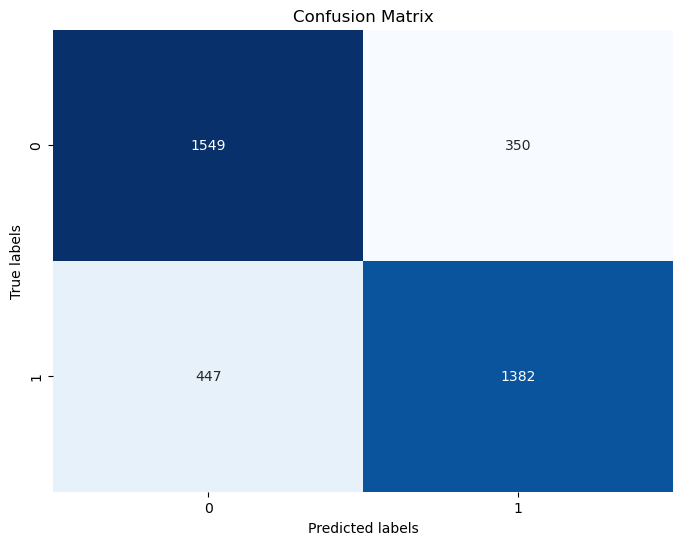

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


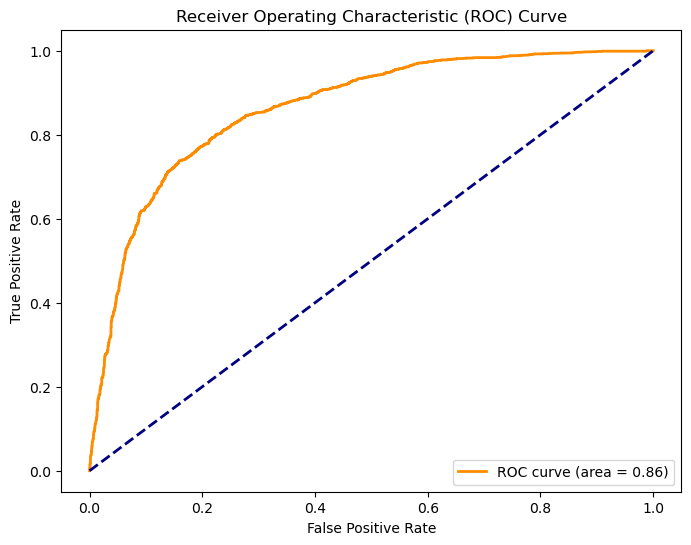

In [92]:
print("\nbone LGBM:")
validate_model(loaded_model_bone_LGBM, X_val_bone_scaled,y_val_bone_seer)


lung LGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Val Accuracy: 0.806157354618016
Val Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       928
           1       0.78      0.82      0.80       826

    accuracy                           0.81      1754
   macro avg       0.81      0.81      0.81      1754
weighted avg       0.81      0.81      0.81      1754



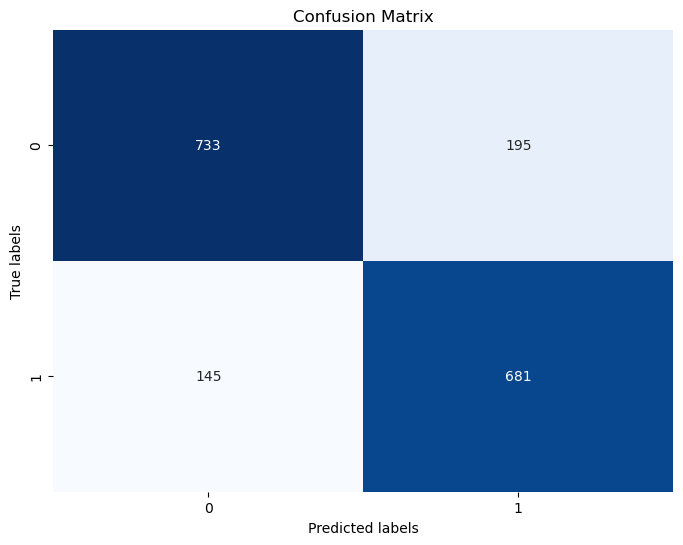

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


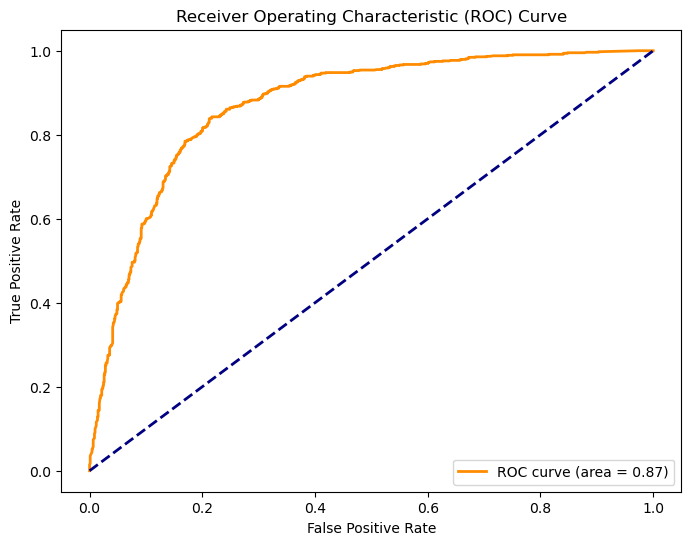

In [93]:
print("\nlung LGBM:")
validate_model(loaded_model_lung_LGBM, X_val_lung_scaled,y_val_lung_seer)


liver LGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Val Accuracy: 0.7844827586206896
Val Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       793
           1       0.76      0.80      0.78       715

    accuracy                           0.78      1508
   macro avg       0.78      0.79      0.78      1508
weighted avg       0.79      0.78      0.78      1508



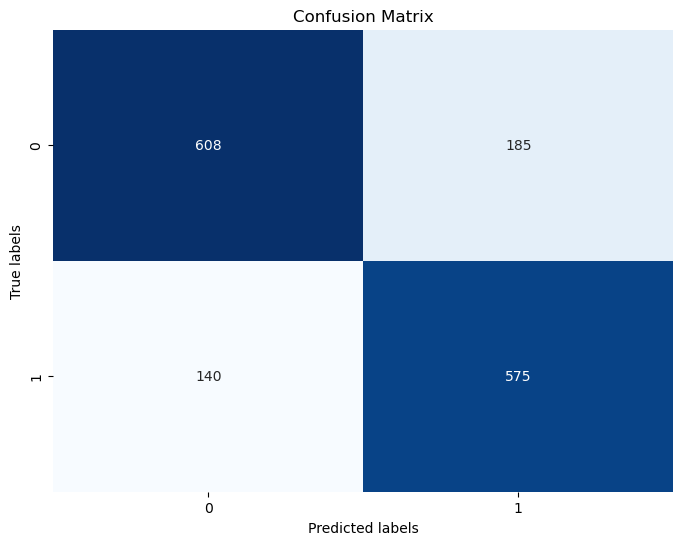

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


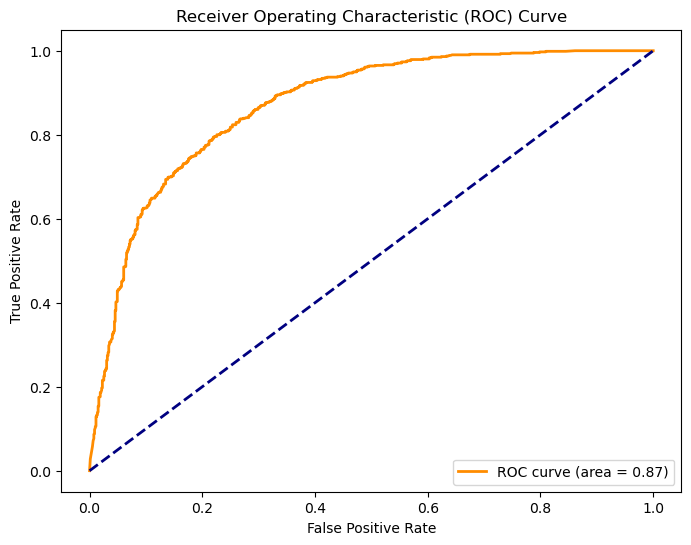

In [94]:
print("\nliver LGBM:")
validate_model(loaded_model_liver_LGBM, X_val_liver_scaled,y_val_liver_seer)


brain LGBM:
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Val Accuracy: 0.8638743455497382
Val Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       208
           1       0.86      0.84      0.85       174

    accuracy                           0.86       382
   macro avg       0.86      0.86      0.86       382
weighted avg       0.86      0.86      0.86       382



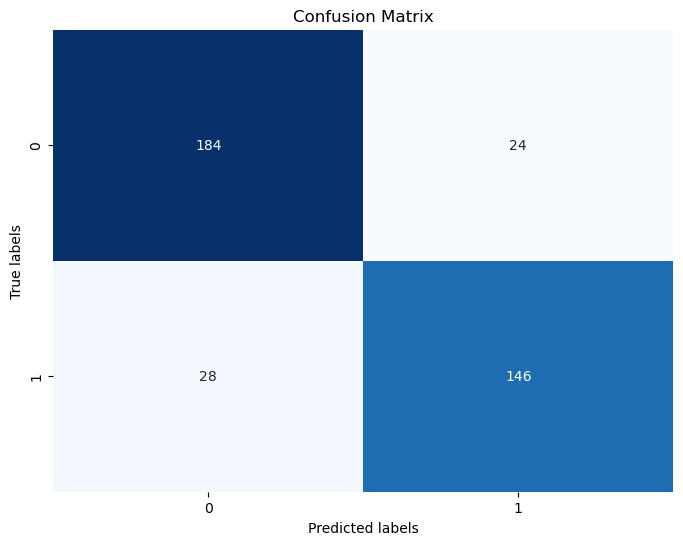

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


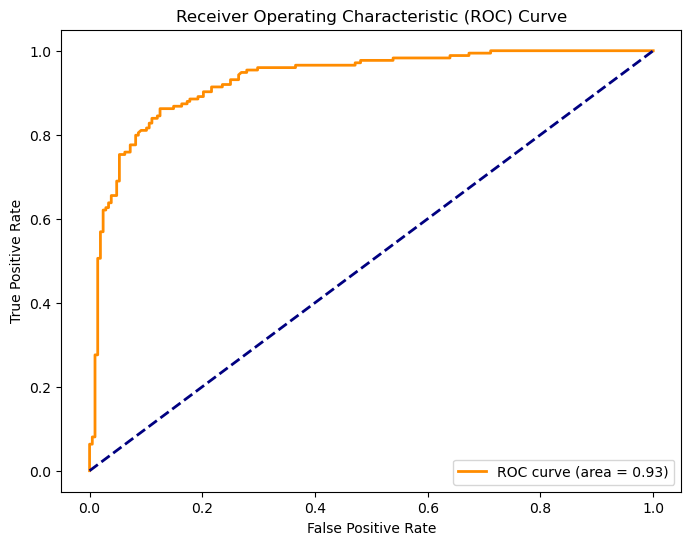

In [95]:
print("\nbrain LGBM:")
validate_model(loaded_model_brain_LGBM, X_val_brain_scaled,y_val_brain_seer)

## **Benchmarking between models of subset validation**
### **Combined ROC Curves**

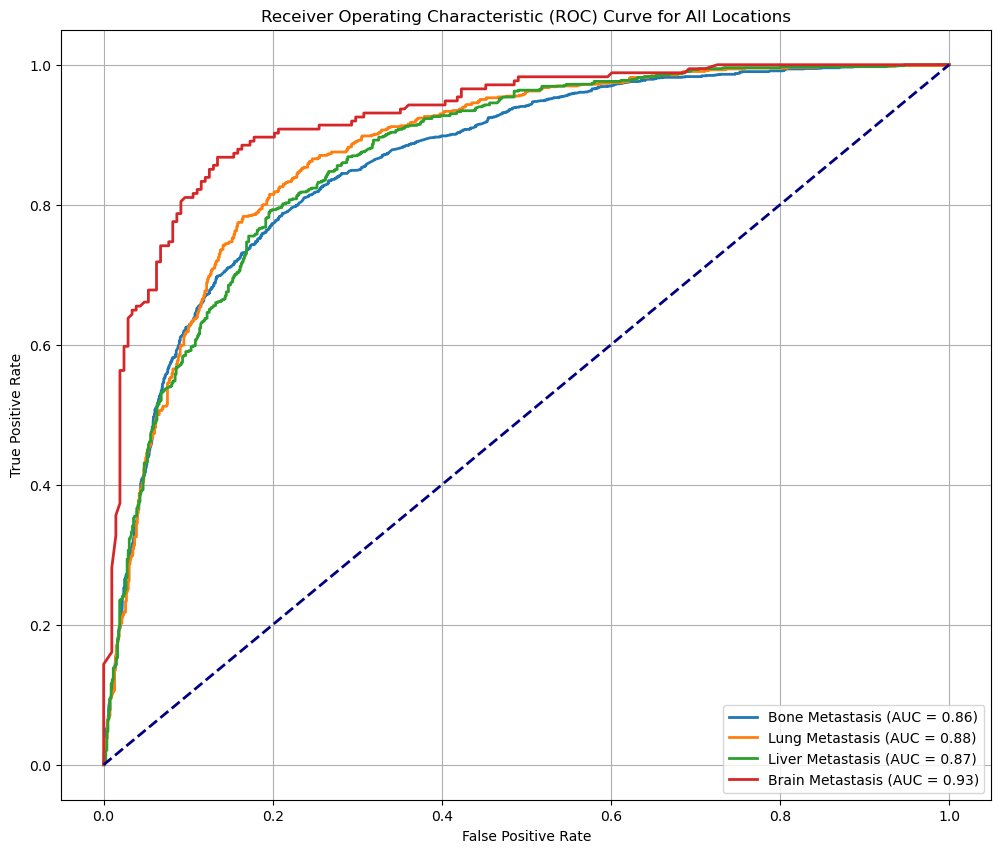

In [96]:
X_tests = [X_val_bone_scaled, X_val_lung_scaled, X_val_liver_scaled, X_val_brain_scaled]
y_tests = [y_val_bone_seer, y_val_lung_seer, y_val_liver_seer, y_val_brain_seer]
models = [loaded_model_bone, loaded_model_lung, loaded_model_liver, loaded_model_brain]
labels = ['Bone Metastasis', 'Lung Metastasis', 'Liver Metastasis', 'Brain Metastasis']

plt.figure(figsize=(12, 10))

for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for All Locations')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC_Combined_Locations_XGBoost.svg', format='svg')
plt.show()

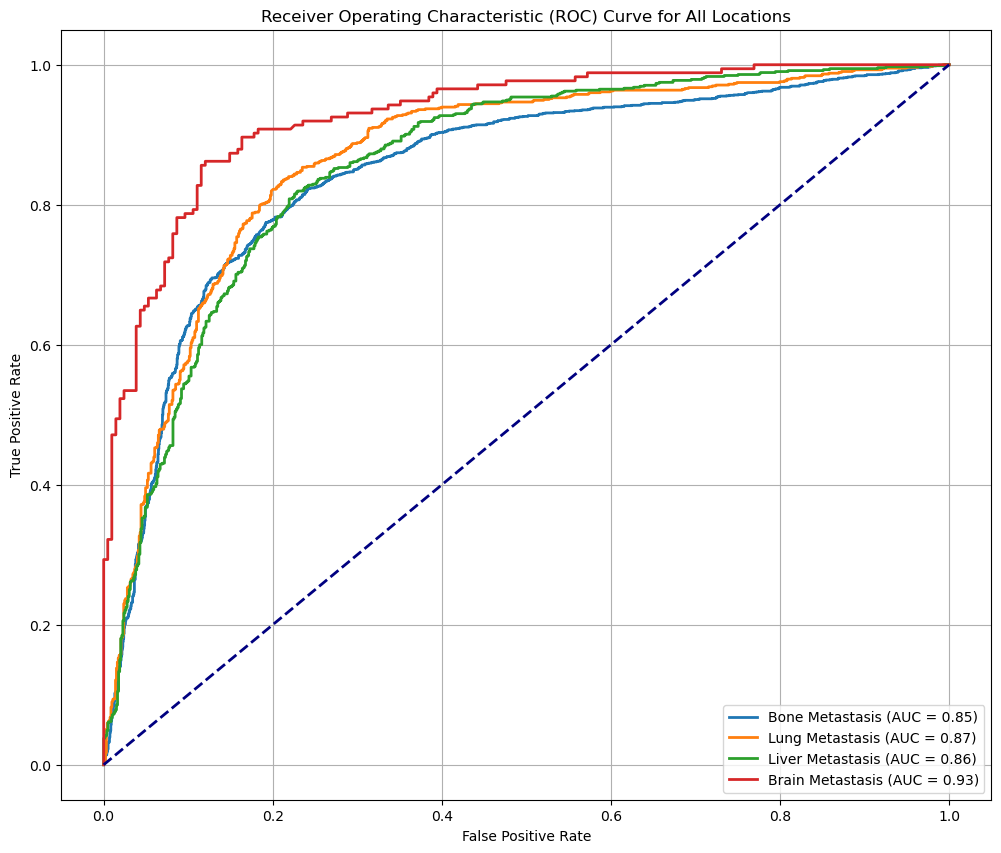

In [97]:
X_tests = [X_val_bone_scaled, X_val_lung_scaled, X_val_liver_scaled, X_val_brain_scaled]
y_tests = [y_val_bone_seer, y_val_lung_seer, y_val_liver_seer, y_val_brain_seer]
models = [loaded_model_bone_SV, loaded_model_lung_SV, loaded_model_liver_SV, loaded_model_brain_SV]
labels = ['Bone Metastasis', 'Lung Metastasis', 'Liver Metastasis', 'Brain Metastasis']

plt.figure(figsize=(12, 10))

for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for All Locations')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC_Combined_Locations_SV.svg', format='svg')
plt.show()

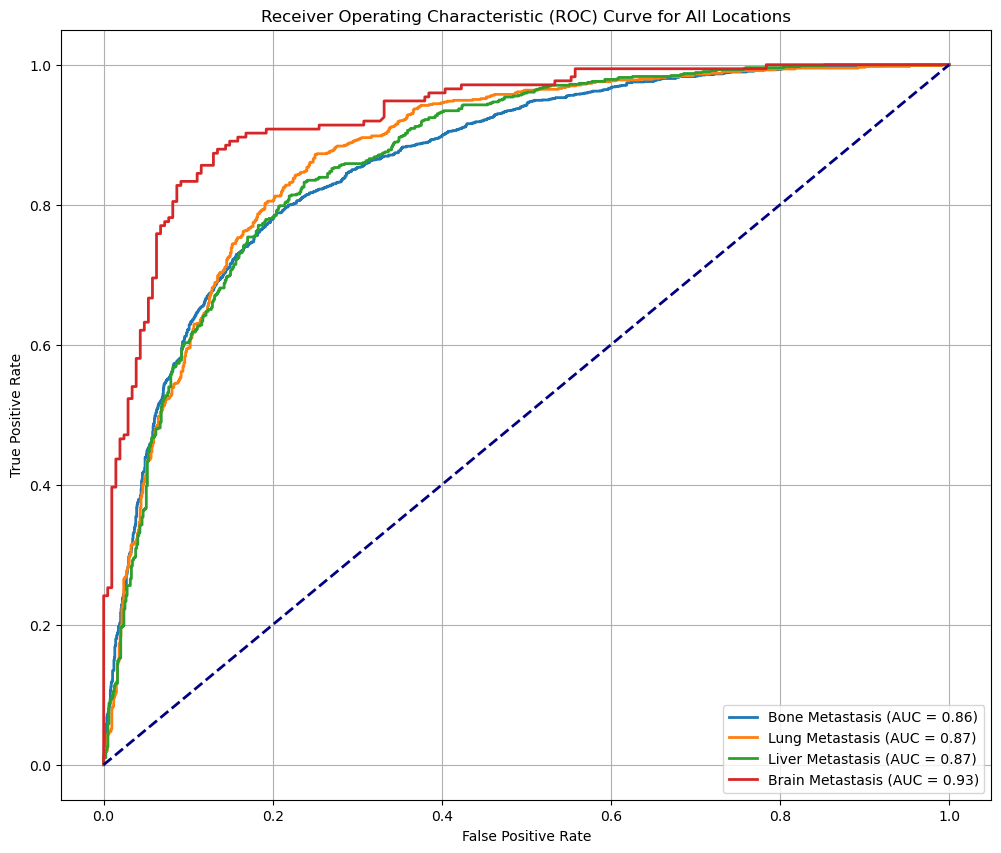

In [98]:
X_tests = [X_val_bone_scaled, X_val_lung_scaled, X_val_liver_scaled, X_val_brain_scaled]
y_tests = [y_val_bone_seer, y_val_lung_seer, y_val_liver_seer, y_val_brain_seer]
models = [loaded_model_bone_rf, loaded_model_lung_rf, loaded_model_liver_rf, loaded_model_brain_rf]
labels = ['Bone Metastasis', 'Lung Metastasis', 'Liver Metastasis', 'Brain Metastasis']

plt.figure(figsize=(12, 10))

for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for All Locations')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC_Combined_Locations_RF.svg', format='svg')
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


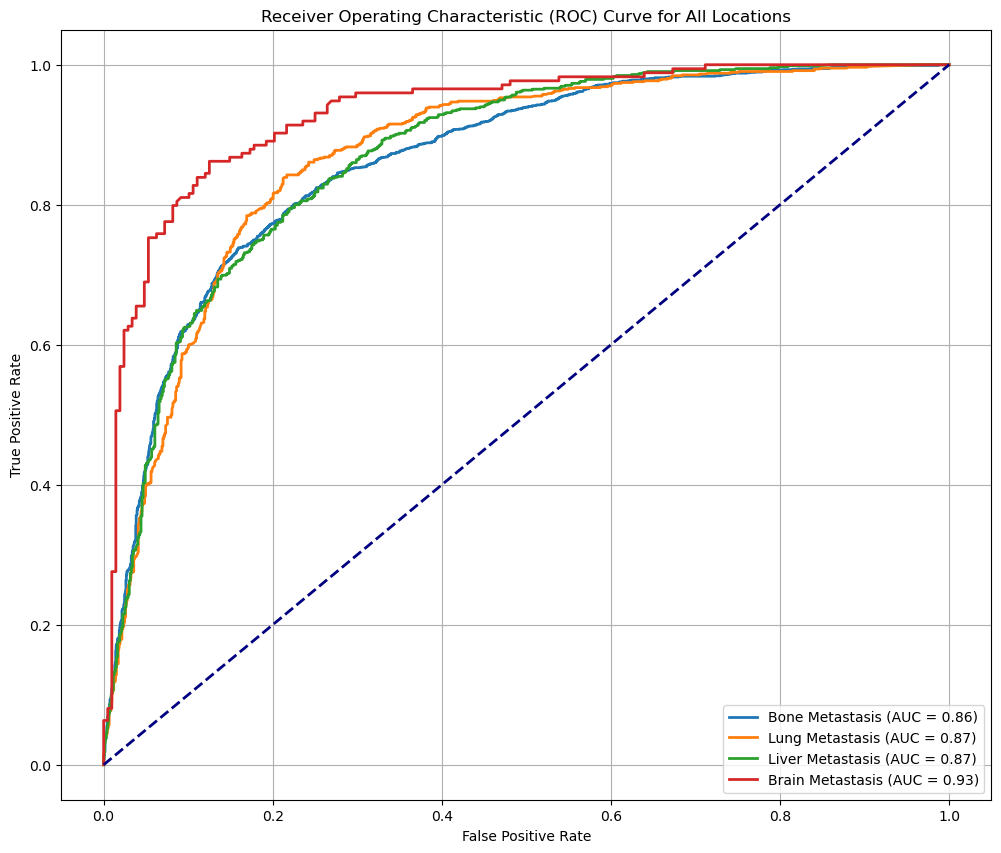

In [99]:
X_tests = [X_val_bone_scaled, X_val_lung_scaled, X_val_liver_scaled, X_val_brain_scaled]
y_tests = [y_val_bone_seer, y_val_lung_seer, y_val_liver_seer, y_val_brain_seer]
models = [loaded_model_bone_LGBM, loaded_model_lung_LGBM, loaded_model_liver_LGBM, loaded_model_brain_LGBM]
labels = ['Bone Metastasis', 'Lung Metastasis', 'Liver Metastasis', 'Brain Metastasis']

plt.figure(figsize=(12, 10))

for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for All Locations')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC_Combined_Locations_lgbm.svg', format='svg')
plt.show()

______________________________________________________________________________________________________________________________________________________

# **6. Baheya Validation**

In [100]:
Baheya_data = pd.read_csv('Distant_baheya.csv')
Baheya_data.head()

Age Menopausal Status Tumor Size Lymph Node Status Tumor Location  \
0  35-39 years               Pre         T3                N3           Left   
1  55-59 years              Post         T3                N2           Left   
2  40-44 years               Pre         T2                N2          Right   
3  30-34 years               Pre         T3                N2           Left   
4  30-34 years               Pre         T3                N3          Right   

  Tumor Grade            Histological Type        ER        PR      HER2  ...  \
0          II  Infiltrating duct carcinoma  Positive  Negative  Negative  ...   
1          II  Infiltrating duct carcinoma  Positive  Positive  Negative  ...   
2          II  Infiltrating duct carcinoma  Positive  Positive  Negative  ...   
3          II  Infiltrating duct carcinoma  Positive  Positive  Negative  ...   
4          II  Infiltrating duct carcinoma  Positive  Positive  Positive  ...   

  Surgery Chemotherapy Radiotherapy Recurrence_Type Liver_metastasis  \
0     Yes          Yes           No         Distant              Yes   
1     Yes          Yes          Yes         Distant               No   
2     Yes          Yes          Yes         Distant               No   
3     Yes          Yes          Yes         Distant              Yes   
4     Yes          Yes          Yes         Distant              Yes   

  Lung_metastasis Bone_metastasis Brain_metastasis  \
0              No             Yes              Yes   
1              No              No              Yes   
2             Yes             Yes              Yes   
3              No              No              Yes   
4             Yes             Yes              Yes   

  Recurrence Free Status (Month)  Overall Survival Status (Month)  
0                           25.0                             68.0  
1                           11.0                             28.0  
2                           89.0                             98.0  
3                           19.0                             98.0  
4                            6.0                             51.0  

[5 rows x 21 columns]

# **Bone**

In [101]:
# see the bone characteristics
Bone_data = Baheya_data[Baheya_data['Bone_metastasis'] == 'No']

tumor_size_counts = Bone_data['Tumor Size'].value_counts(normalize=True) * 100

lymph_node_status_counts = Bone_data['Lymph Node Status'].value_counts(normalize=True) * 100

tumor_grade_counts = Bone_data['Tumor Grade'].value_counts(normalize=True) * 100

Mol_counts = Bone_data['Mol Subtype'].value_counts(normalize=True) * 100

print(tumor_size_counts)

print(lymph_node_status_counts)

print(tumor_grade_counts)

print(Mol_counts)


Tumor Size
T2    38.823529
T4    30.588235
T3    25.882353
T1     4.705882
Name: proportion, dtype: float64
Lymph Node Status
N1    45.882353
N2    18.823529
N3    17.647059
N0    17.647059
Name: proportion, dtype: float64
Tumor Grade
II     69.411765
III    25.882353
I       4.705882
Name: proportion, dtype: float64
Mol Subtype
Luminal A          63.529412
Triple Negative    24.705882
Luminal B           8.235294
HER2 enriched       3.529412
Name: proportion, dtype: float64


In [102]:
Baheya_data['Bone_metastasis'].value_counts()

Bone_metastasis
Yes    169
No      85
Name: count, dtype: int64

In [103]:
X_val_bone = Baheya_data.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Tumor Location','PR','Histological Type','Menopausal Status','Recurrence_Type','Recurrence Free Status (Month)','Bone_metastasis'],axis=1)
y_val_bone = Baheya_data['Bone_metastasis']

In [104]:
X_val_bone = one_hot_encode_columns(X_val_bone, columns_to_encode)

In [105]:
size = X_val_bone.columns.get_loc('Tumor Size_T1')
X_val_bone.insert(size,'Tumor Size_T0', 0)

# Determine the insert locations for 'Age_45-49 years' and 'Age_80-84 years'
#age_loc_45_49 = X_val_bone.columns.get_loc('Age_50-54 years')
#X_val_bone.insert(age_loc_45_49, 'Age_45-49 years', 0)

#age_loc_80_84 = len(X_val_bone.columns)  # Insert at the end
#X_val_bone.insert(age_loc_80_84, 'Age_80-84 years', 0)
sur = X_val_bone.columns.get_loc('Surgery_Yes')
X_val_bone.insert(sur,'Surgery_No', 0)

In [106]:
X_val_bone_sca = X_val_bone.copy()
X_val_bone_sca['Overall Survival Status (Month)'] = scaler_bone.transform(X_val_bone_sca[['Overall Survival Status (Month)']])

In [107]:
y_val_bone = label_encoder_bone.transform(y_val_bone)

In [108]:
y_pred_val_bone = loaded_model_bone.predict(X_val_bone_sca)
val_acc = accuracy_score(y_val_bone, y_pred_val_bone)
val_report = classification_report(y_val_bone, y_pred_val_bone)
print("\nVal Accuracy:", val_acc)
print("Val Classification Report:")
print(val_report)


Val Accuracy: 0.46062992125984253
Val Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.81      0.50        85
           1       0.75      0.28      0.41       169

    accuracy                           0.46       254
   macro avg       0.56      0.55      0.46       254
weighted avg       0.62      0.46      0.44       254



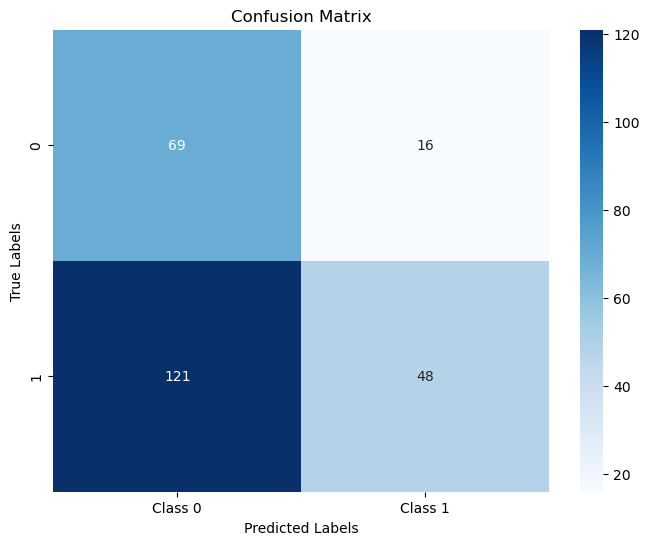

In [109]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val_bone, y_pred_val_bone)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Lung**

In [110]:
Baheya_data['Lung_metastasis'].value_counts()

Lung_metastasis
No     143
Yes    111
Name: count, dtype: int64

In [111]:
X_val_lung = Baheya_data.drop(columns=['Tumor Location','PR','Histological Type','Menopausal Status','Recurrence_Type','Recurrence Free Status (Month)','Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_lung = Baheya_data['Lung_metastasis']

In [112]:
X_val_lung = one_hot_encode_columns(X_val_lung, columns_to_encode)

In [113]:
sur = X_val_lung.columns.get_loc('Surgery_Yes')
X_val_lung.insert(sur,'Surgery_No', 0)

size = X_val_lung.columns.get_loc('Tumor Size_T1')
X_val_lung.insert(size,'Tumor Size_T0', 0)


In [114]:
X_val_lung_sca = X_val_lung.copy()
X_val_lung_sca['Overall Survival Status (Month)'] = scaler_lung.transform(X_val_lung_sca[['Overall Survival Status (Month)']])

In [115]:
y_val_lung = label_encoder_lung.transform(y_val_lung)

In [116]:
y_pred_val_lung = loaded_model_lung.predict(X_val_lung_sca)
val_acc = accuracy_score(y_val_lung, y_pred_val_lung)
val_report = classification_report(y_val_lung, y_pred_val_lung)
print("\nVal Accuracy:", val_acc)
print("Val Classification Report:")
print(val_report)


Val Accuracy: 0.49606299212598426
Val Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.75      0.63       143
           1       0.35      0.17      0.23       111

    accuracy                           0.50       254
   macro avg       0.44      0.46      0.43       254
weighted avg       0.45      0.50      0.45       254



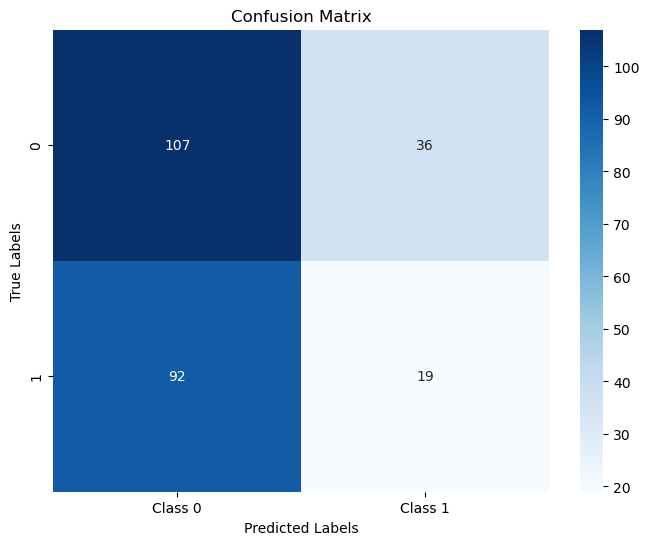

In [117]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val_lung, y_pred_val_lung)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Liver**

In [118]:
Baheya_data['Liver_metastasis'].value_counts()

Liver_metastasis
No     144
Yes    110
Name: count, dtype: int64

In [119]:
X_val_liver = Baheya_data.drop(columns=['Tumor Location','PR','Histological Type','Menopausal Status','Recurrence_Type','Recurrence Free Status (Month)','Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_liver = Baheya_data['Liver_metastasis']

In [120]:
X_val_liver = one_hot_encode_columns(X_val_liver, columns_to_encode)

In [121]:
sur = X_val_liver.columns.get_loc('Surgery_Yes')
X_val_liver.insert(sur,'Surgery_No', 0)

size = X_val_liver.columns.get_loc('Tumor Size_T1')
X_val_liver.insert(size,'Tumor Size_T0', 0)

In [122]:
X_val_liver_sca = X_val_liver.copy()
X_val_liver_sca['Overall Survival Status (Month)'] = scaler_liver.transform(X_val_liver_sca[['Overall Survival Status (Month)']])

In [123]:
y_val_liver = label_encoder_liver.transform(y_val_liver)

In [124]:
y_pred_val_liver = loaded_model_liver.predict(X_val_liver_sca)
val_acc = accuracy_score(y_val_liver, y_pred_val_liver)
val_report = classification_report(y_val_liver, y_pred_val_liver)
print("\nVal Accuracy:", val_acc)
print("Val Classification Report:")
print(val_report)


Val Accuracy: 0.5669291338582677
Val Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.72       144
           1       0.50      0.02      0.04       110

    accuracy                           0.57       254
   macro avg       0.53      0.50      0.38       254
weighted avg       0.54      0.57      0.42       254



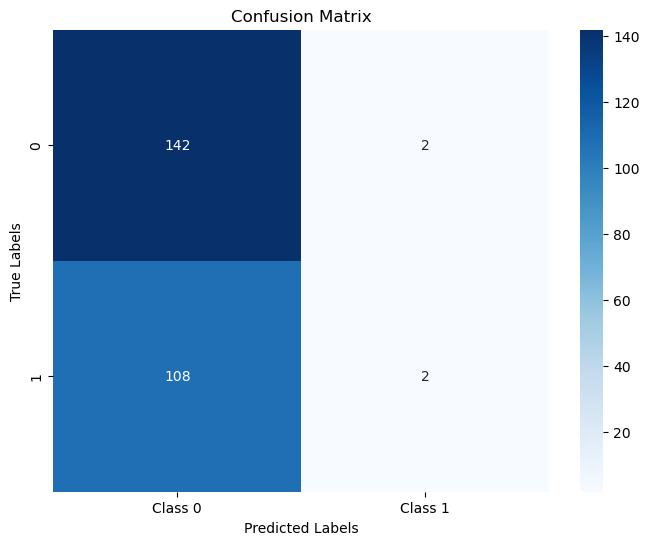

In [125]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val_liver, y_pred_val_liver)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Brain**

In [126]:
Baheya_data['Brain_metastasis'].value_counts()

Brain_metastasis
No     206
Yes     48
Name: count, dtype: int64

In [127]:
X_val_brain = Baheya_data.drop(columns=['Tumor Location','PR','Histological Type','Menopausal Status','Recurrence_Type','Recurrence Free Status (Month)','Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_brain = Baheya_data['Brain_metastasis']

In [128]:
X_val_brain = one_hot_encode_columns(X_val_brain, columns_to_encode)

In [129]:
#size = X_val_brain.columns.get_loc('Tumor Size_T1')
#X_val_brain.insert(size,'Tumor Size_T0', 0)

sur = X_val_brain.columns.get_loc('Surgery_Yes')
X_val_brain.insert(sur,'Surgery_No', 0)

In [130]:
X_val_brain_sca = X_val_brain.copy()
X_val_brain_sca['Overall Survival Status (Month)'] = scaler_brain.transform(X_val_brain_sca[['Overall Survival Status (Month)']])

In [131]:
y_val_brain = label_encoder_brain.transform(y_val_brain)

In [132]:
y_pred_val_brain = loaded_model_brain.predict(X_val_brain_sca)
val_acc = accuracy_score(y_val_brain, y_pred_val_brain)
val_report = classification_report(y_val_brain, y_pred_val_brain)
print("\nVal Accuracy:", val_acc)
print("Val Classification Report:")
print(val_report)


Val Accuracy: 0.6259842519685039
Val Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       206
           1       0.14      0.19      0.16        48

    accuracy                           0.63       254
   macro avg       0.47      0.46      0.46       254
weighted avg       0.67      0.63      0.65       254



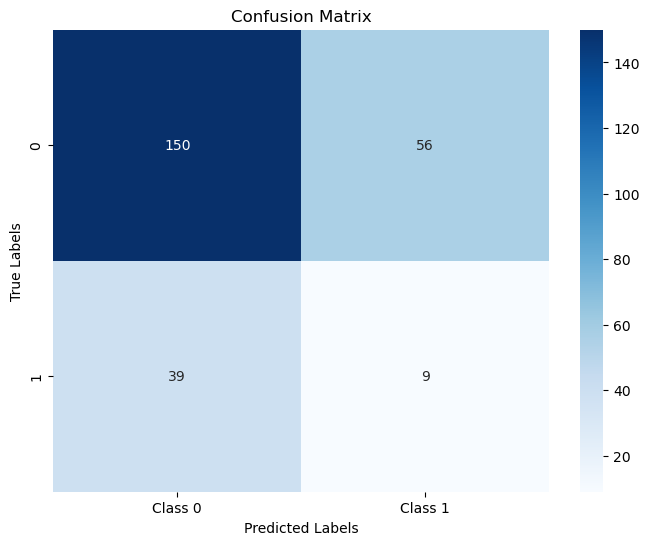

In [133]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val_brain, y_pred_val_brain)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Combined ROC**

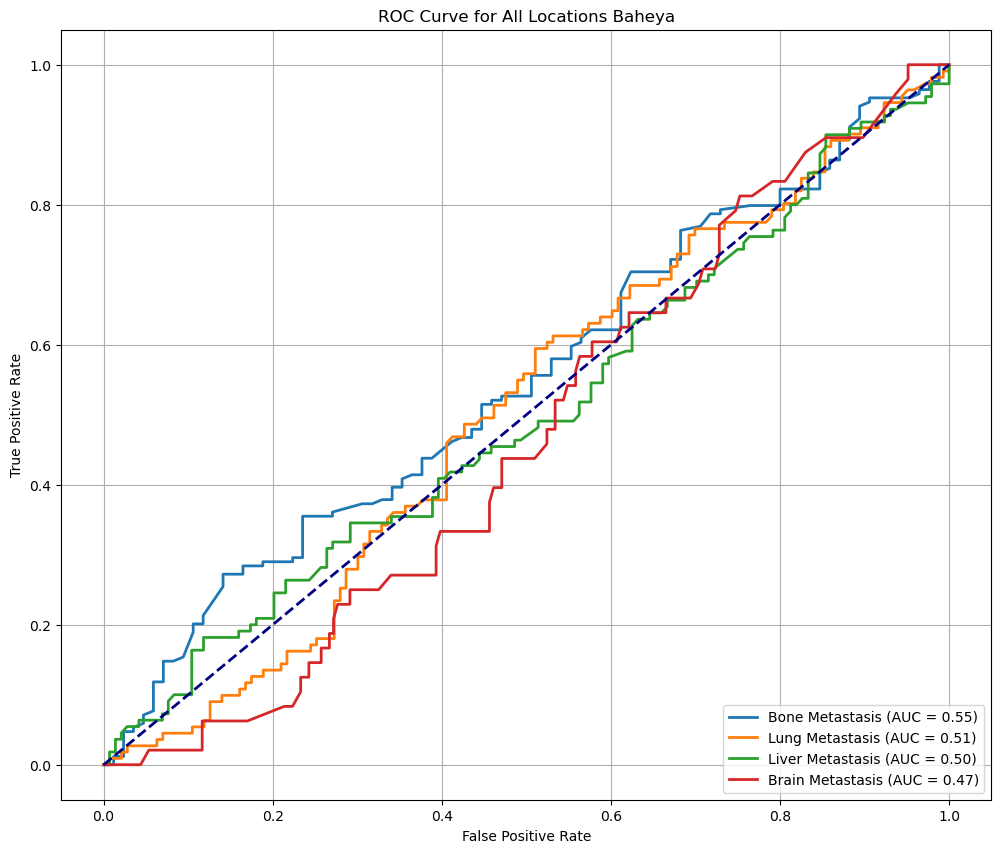

In [134]:
X_tests = [X_val_bone_sca, X_val_lung_sca, X_val_liver_sca, X_val_brain_sca]
y_tests = [y_val_bone, y_val_lung, y_val_liver, y_val_brain]
models = [loaded_model_bone, loaded_model_lung, loaded_model_liver, loaded_model_brain]
labels = ['Bone Metastasis', 'Lung Metastasis', 'Liver Metastasis', 'Brain Metastasis']

plt.figure(figsize=(12, 10))

for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Locations Baheya')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC_Combined_Locations_baheya.svg', format='svg')
plt.show()